In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

# Ler ficheiros

In [2]:
#Remover acidentes que nao interessam na frança (queremos ter o mesmo espaço temporal logo eliminar todos de 2014 para cima)
accidentsFR = pd.read_csv('FR\\caracteristics.csv', sep=',', encoding='latin1')
accidentsFR = accidentsFR.drop(accidentsFR[accidentsFR.an > 14].index)

#Ler os restantes
accidentsUK = pd.read_csv('UK\\Accidents0514.csv', sep=',')
personsUK = pd.read_csv('UK\\Casualties0514.csv', sep=',')
vehiclesUK = pd.read_csv('UK\\Vehicles0514.csv', sep=',')

placesFR = pd.read_csv('FR\\places.csv', sep=',')
personsFR = pd.read_csv('FR\\users.csv', sep=',')
vehiclesFR = pd.read_csv('FR\\vehicles.csv', sep=',')

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Juntar tabelas so para facilitar a leitura dos campos
uk = pd.merge(accidentsUK, personsUK, left_on='Accident_Index', right_on='Accident_Index', how='left')
uk = pd.merge(uk, vehiclesUK, left_on='Accident_Index', right_on='Accident_Index', how='left')

fr = pd.merge(accidentsFR, placesFR, left_on='Num_Acc', right_on='Num_Acc', how='left')
fr = pd.merge(fr, personsFR, left_on='Num_Acc', right_on='Num_Acc', how='left')
fr = pd.merge(fr, vehiclesFR, left_on='Num_Acc', right_on='Num_Acc', how='left')

In [4]:
uk.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,1,1,3,1,37,7,2,1,1,0,0,-1,0,1,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,1,1,2,1,37,7,3,0,0,0,4,-1,11,1,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840,1,1,3,1,30,6,3,5,2,0,0,-1,0,1,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


Accident_Index: ID do acidente<br>
Location_Easting/Northing_OSGR: localização para QGIS<br>
Longitude/Latitude<br>
Police_Force: Tipo de Policia(1 a 98)<br>

Accident_Severity:<br>
1-Fatal<br>
2-Serious<br>
3-Slight<br>

Number_of_Vehicles: numero de veiculos no acidente<br>
Number_of_Casualties: numero de casualidades causadas pelo acidente<br>
Date<br>
Day_of_Week: 1(Domingo) a 7(Sabado)<br>
Time<br>
District: Codigo do distrito onde aconteu<br>
Highway: Código da autoestrada<br>

1st/2nd_Road_Class: Classe da estrada<br>
0-Not at junction or within 20 metres
1-Motorway<br>
2-A(M)<br>
3-A<br>
4-B<br>
5-C<br>
6-Unclassified<br>

1st/2nd_Road_Number: Numero da estrada<br>

Road_Type: Tipo de estrada<br>
1-Roundabout<br>
2-One way street<br>
3-Dual carriageway<br>
6-Single carriageway<br>
7-Slip road<br>
9-Unknown<br>
12-One way street/Slip road<br>
-1-Data missing or out of range<br>

Speed_Limit<br>

Junction_Detail: Se o acidente aconteceu numa junção de estradas que tipo de junção<br>
0-Not at junction or within 20 metres<br>
1-Roundabout<br>
2-Mini-roundabout<br>
3-T or staggered junction<br>
5-Slip road<br>
6-Crossroads<br>
7-More than 4 arms (not roundabout)<br>
8-Private drive or entrance<br>
9-Other junction<br>
-1-Data missing or out of range<br>


Junction_Control: O que controla a junção<br>
0-Not at junction or within 20 metres<br>
1-Authorised person<br>
2-Auto traffic signal<br>
3-Stop sign<br>
4-Give way or uncontrolled<br>
-1-Data missing or out of range<br>


Pedestrian_Crossing-Human_Control: Controlo de pedrestres<br>
0-None within 50 metres<br>
1-Control by school crossing patrol<br>
2-Control by other authorised person<br>
-1-Data missing or out of range<br>

Pedestrian_Crossing-Physical_Facilities: Maneira que os pedestres têm de passar a estrada<br>
0-No physical crossing facilities within 50 metres<br>
1-Zebra<br>
4-Pelican, puffin, toucan or similar non-junction pedestrian light crossing<br>
5-Pedestrian phase at traffic signal junction<br>
7-Footbridge or subway<br>
8-Central refuge<br>
-1-Data missing or out of range<br>

Light_Conditions: Nivel de luz<br>
1-Daylight<br>
4-Darkness - lights lit<br>
5-Darkness - lights unlit<br>
6-Darkness - no lighting<br>
7-Darkness - lighting unknown<br>
-1-Data missing or out of range<br>

Weather_Conditions:<br>
1-Fine no high winds<br>
2-Raining no high winds<br>
3-Snowing no high winds<br>
4-Fine + high winds<br>
5-Raining + high winds<br>
6-Snowing + high winds<br>
7-Fog or mist<br>
8-Other<br>
9-Unknown<br>
-1-Data missing or out of range<br>

Road_Surface_Conditions: Como se encontrava a estrada quando aconteceu o acidente<br>
1-Dry<br>
2-Wet or damp<br>
3-Snow<br>
4-Frost or ice<br>
5-Flood over 3cm. deep<br>
6-Oil or diesel<br>
7-Mud<br>
-1-Data missing or out of range<br>

Special_Conditions_at_Site: Se estava algo especial a acontecer na estrada<br>
0-None<br>
1-Auto traffic signal - out<br>
2-Auto signal part defective<br>
3-Road sign or marking defective or obscured<br>
4-Roadworks<br>
5-Road surface defective<br>
6-Oil or diesel<br>
7-Mud<br>
-1-Data missing or out of range<br>

Carriageway_Hazards: Se a estrada tinha algo no meio<br>
0-None<br>
1-Vehicle load on road<br>
2-Other object on road<br>
3-Previous accident<br>
4-Dog on road<br>
5-Other animal on road<br>
6-Pedestrian in carriageway - not injured<br>
7-Any animal in carriageway (except ridden horse)<br>
-1-Data missing or out of range<br>

Urban_or_Rural_Area: Indica se é uma zona urbana ou rual<br>
1-Urban<br>
2-Rural<br>
3-Unallocated<br>

Did_Police_Officer_Attend_Scene_of_Accident: Se a policia foi ter ao local<br>
1-Yes<br>
2-No<br>
3-No, accident was reported using a self completion  form (self rep only)<br>

LSOA_of_Accident_Location -> Código da lower layer do acidente<br>

Vehicle_Reference_x: Numero do Veiculo no acidente <br>
Casualty_Reference: ##n faço ideia<br>

Sex_of_Casualty:<br>
1-Male<br>
2-Female<br>
-1-Data missing or out of range<br>

Age_of_Casualty: Idade da pessoa<br>
Age_Band_Casualty: Banda de idade<br>

Casualty_Severity: Severidade do acidente na pessoa<br>
1-Fatal<br>
2-Serious<br>
3-Slight<br>

Pedestrian_Location: Se for um pedestre, onde se encontrava<br>
0-Not a Pedestrian<br>
1-Crossing on pedestrian crossing facility<br>
2-Crossing in zig-zag approach lines<br>
3-Crossing in zig-zag exit lines<br>
4-Crossing elsewhere within 50m. of pedestrian crossing<br>
5-In carriageway, crossing elsewhere<br>
6-On footway or verge<br>
7-On refuge, central island or central reservation<br>
8-In centre of carriageway - not on refuge, island or central reservation<br>
9-In carriageway, not crossing<br>
10-Unknown or other<br>
-1-Data missing or out of range<br>

Pedestrian_Movement: Tipo de movimento caso seja pedestre<br>
0-Not a Pedestrian<br>
1-Crossing from driver's nearside<br>
2-Crossing from nearside - masked by parked or stationary vehicle<br>
3-Crossing from driver's offside<br>
4-Crossing from offside - masked by  parked or stationary vehicle<br>
5-In carriageway, stationary - not crossing  (standing or playing)<br>
6-In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle<br>
7-Walking along in carriageway, facing traffic<br>
8-Walking along in carriageway, back to traffic<br>
9-Unknown or other<br>
-1-Data missing or out of range<br>

Car_Passenger:Se for passageiro no carro onde se encontrava<br>
0-Not car passenger<br>
1-Front seat passenger<br>
2-Rear seat passenger<br>
-1-Data missing or out of range<br>

Bus_or_Coach_Passenger: No caso de ser um autocarro onde se encontrava<br>
0-Not a bus or coach passenger<br>
1-Boarding<br>
2-Alighting<br>
3-Standing passenger<br>
4-Seated passenger<br>
-1-Data missing or out of range<br>

Pedestrian_Road_Maintenance_Worker: Se for um trabalhador na manutenção de estradas<br>
0-No / Not applicable<br>
1-Yes<br>
2-Not Known<br>
-1-Data missing or out of range<br>

Casualty_Type: Tipo de pessoa<br>
0-Pedestrian<br>
1-Cyclist<br>
2-Motorcycle 50cc and under rider or passenger<br>
3-Motorcycle 125cc and under rider or passenger<br>
4-Motorcycle over 125cc and up to 500cc rider or  passenger<br>
5-Motorcycle over 500cc rider or passenger<br>
8-Taxi/Private hire car occupant<br>
9-Car occupant<br>
10-Minibus (8 - 16 passenger seats) occupant<br>
11-Bus or coach occupant (17 or more pass seats)<br>
16-Horse rider<br>
17-Agricultural vehicle occupant<br>
18-Tram occupant<br>
19-Van / Goods vehicle (3.5 tonnes mgw or under) occupant<br>
20-Goods vehicle (over 3.5t. and under 7.5t.) occupant<br>
21-Goods vehicle (7.5 tonnes mgw and over) occupant<br>
22-Mobility scooter rider<br>
23-Electric motorcycle rider or passenger<br>
90-Other vehicle occupant<br>
97-Motorcycle - unknown cc rider or passenger<br>
98-Goods vehicle (unknown weight) occupant<br>

Casualty_Home_Area_Type: Zona onde mora a pessoa<br>
1-Urban area<br>
2-Small town<br>
3-Rural<br>
-1-Data missing or out of range<br>

Vehicle_Reference_y: Numero de referencia do veiculo<br>

Vehicle_Type:<br>
1-Pedal cycle<br>
2-Motorcycle 50cc and under<br>
3-Motorcycle 125cc and under<br>
4-Motorcycle over 125cc and up to 500cc<br>
5-Motorcycle over 500cc<br>
8-Taxi/Private hire car<br>
9-Car<br>
10-Minibus (8 - 16 passenger seats)<br>
11-Bus or coach (17 or more pass seats)<br>
16-Ridden horse<br>
17-Agricultural vehicle<br>
18-Tram<br>
19-Van / Goods 3.5 tonnes mgw or under<br>
20-Goods over 3.5t. and under 7.5t<br>
21-Goods 7.5 tonnes mgw and over<br>
22-Mobility scooter<br>
23-Electric motorcycle<br>
90-Other vehicle<br>
97-Motorcycle - unknown cc<br>
98-Goods vehicle - unknown weight<br>
-1-Data missing or out of range<br>

Towing_and_Articulation: Caso o carro envolvido no acidente tenha algo atrelado<br>
0-No tow/articulation<br>
1-Articulated vehiclev
2-Double or multiple trailer<br>
3-Caravan<br>
4-Single trailer<br>
5-Other tow<br>
-1-Data missing or out of range<br>

Vehicle_Manoeuvre: Manobra que causou o acidente<br>
1-Reversing<br>
2-Parked<br>
3-Waiting to go - held up<br>
4-Slowing or stopping<br>
5-Moving off<br>
6-U-turn<br>
7-Turning left<br>
8-Waiting to turn left<br>
9-Turning right<br>
10-Waiting to turn right<br>
11-Changing lane to left<br>
12-Changing lane to right<br>
13-Overtaking moving vehicle - offside<br>
14-Overtaking static vehicle - offside<br>
15-Overtaking - nearside<br>
16-Going ahead left-hand bend<br>
17-Going ahead right-hand bend<br>
18-Going ahead other<br>
-1-Data missing or out of range<br>

Vehicle_Location-Restricted_Lane: Se o veiculo se encontrava numa faixa restrita e qual<br>
0-On main c'way - not in restricted lane<br>
1-Tram/Light rail track<br>
2-Bus lane<br>
3-Busway (including guided busway)<br>
4-Cycle lane (on main carriageway)<br>
5-Cycleway or shared use footway (not part of  main carriageway)<br>
6-On lay-by or hard shoulder<br>
7-Entering lay-by or hard shoulder<br>
8-Leaving lay-by or hard shoulder<br>
9-Footway (pavement)<br>
10-Not on carriageway<br>
-1-Data missing or out of range<br>

Junction_Location: Caso seja uma junção de estradas onde ela se encontra<br>
0-Not at or within 20 metres of junction<br>
1-Approaching junction or waiting/parked at junction approach<br>
2-Cleared junction or waiting/parked at junction exit<br>
3-Leaving roundabout<br>
4-Entering roundabout<br>
5-Leaving main road<br>
6-Entering main road<br>
7-Entering from slip road<br>
8-Mid Junction - on roundabout or on main road<br>
-1-Data missing or out of range<br>

Skidding_and_Overturning: Se aconteceu derrapagem ou capotagem do carro<br>
0-None<br>
1-Skidded<br>
2-Skidded and overturned<br>
3-Jackknifed<br>
4-Jackknifed and overturned<br>
5-Overturned<br>
-1-Data missing or out of range<br>

Hit_Object_in_Carriageway: Se atingiu algum objeto na estrada<br>
0-None<br>
1-Previous accident<br>
2-Road works<br>
4-Parked vehicle<br>
5-Bridge (roof)<br>
6-Bridge (side)<br>
7-Bollard or refuge<br>
8-Open door of vehicle<br>
9-Central island of roundabout<br>
10-Kerb<br>
11-Other object<br>
12-Any animal (except ridden horse)<br>
-1-Data missing or out of range<br>

Vehicle_Leaving_Carriageway: Se o acidente causou que o veiculo saisse da estrada<br>
0-Did not leave carriageway<br>
1-Nearside<br>
2-Nearside and rebounded<br>
3-Straight ahead at junction<br>
4-Offside on to central reservation<br>
5-Offside on to centrl res + rebounded<br>
6-Offside - crossed central reservation<br>
7-Offside<br>
8-Offside and rebounded<br>
-1-Data missing or out of range<br>

Hit_Object_off_Carriageway: Se o acidente saiu da estrada e atingiu algum objeto<br>
0-None<br>
1-Road sign or traffic signal<br>
2-Lamp post<br>
3-Telegraph or electricity pole<br>
4-Tree<br>
5-Bus stop or bus shelter<br>
6-Central crash barrier<br>
7-Near/Offside crash barrier<br>
8-Submerged in water<br>
9-Entered ditch<br>
10-Other permanent object<br>
11-Wall or fence<br>
-1-Data missing or out of range<br>

1st_Point_of_Impact: Ponto de contacto do acidente<br>
0-Did not impact<br>
1-Front<br>
2-Back<br>
3-Offside<br>
4-Nearside<br>
-1-Data missing or out of range<br>

Was_Vehicle_Left_Hand_Drive?:<br>
1-No<br>
2-Yes<br>
-1-Data missing or out of range<br>

Journey_Purpose_of_Driver:<br>
1-Journey as part of work<br>
2-Commuting to/from work<br>
3-Taking pupil to/from school<br>
4-Pupil riding to/from school<br>
5-Other<br>
6-Not known<br>
15-Other/Not known (2005-10)<br>
-1-Data missing or out of range<br>

Sex_of_Driver:<br>
1-Male<br>
2-Female<br>
3-Not known<br>
-1-Data missing or out of range<br>

Age_of_Driver: Idade da pessoa<br>
Age_Band_of_Driver: Gama da idade<br>

Engine_Capacity_(CC): Capacidade do motor do veiculo envolvido no acidente<br>

Propulsion_Code: Tipo de combustivel que o veiculo usa <br>
1-Petrol<br>
2-Heavy oil<br>
3-Electric<br>
4-Steam<br>
5-Gas<br>
6-Petrol/Gas (LPG)<br>
7-Gas/Bi-fuel<br>
8-Hybrid electric<br>
9-Gas Diesel<br>
10-New fuel technology<br>
11-Fuel cells<br>
12-Electric diesel<br>
M-Undefined<br>

Age_of_Vehicle: Idade do veiculo no acidente <br>

Driver_IMD_Decile: Defice do nivel economico do condutor<br>
1-Most deprived 10%<br>
2-More deprived 10-20%<br>
3-More deprived 20-30%<br>
4-More deprived 30-40%<br>
5-More deprived 40-50%<br>
6-Less deprived 40-50%<br>
7-Less deprived 30-40%<br>
8-Less deprived 20-30%<br>
9-Less deprived 10-20%<br>
10-Least deprived 10%<br>
-1-Data missing or out of range<br>

Driver_Home_Area_Type: Zona onde o condutor mora<br>
1-Urban area<br>
2-Small town<br>
3-Rural<br>
-1-Data missing or out of range<br>

In [5]:
fr.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh_x,senc,catv,occutc,obs,obsm,choc,manv,num_veh_y
0,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1971.0,A01,0.0,33,0,0.0,2.0,1.0,1.0,A01
1,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1971.0,A01,0.0,7,0,0.0,0.0,6.0,15.0,B02
2,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1992.0,B02,0.0,33,0,0.0,2.0,1.0,1.0,A01
3,201400000001,14,5,7,2015,1,2,1,1.0,3.0,11.0,route de don,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1992.0,B02,0.0,7,0,0.0,0.0,6.0,15.0,B02
4,201400000002,14,5,31,430,1,2,1,1.0,6.0,11.0,106 ROUTE DE DON,M,0.0,0.0,590,3.0,41.0,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,62.0,1.0,0.0,4.0,99.0,1.0,1,4,1,5.0,11.0,0.0,0.0,0.0,1983.0,A01,0.0,7,0,1.0,0.0,7.0,13.0,A01


Num_Acc : Accident ID<br>

jour : Day of the accident<br>
mois : Month of the accident<br>
an : Year of the accident<br>
hrmn : Time of the accident in hour and minutes (hhmm)<br>

lum : Lighting : lighting conditions in which the accident occurred<br>
1 - Full day<br>
2 - Twilight or dawn<br>
3 - Night without public lighting<br>
4 - Night with public lighting not lit<br>
5 - Night with public lighting on<br>

dep : Departmeent : INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed
by a 0 (201 Corse-du-Sud - 202 Haute-Corse)<br>
com : Municipality: The commune number is a code given by INSEE. The code has 3 numbers set to the right.<br>

agg: Localisation :<br>
1 - Out of agglomeration<br>
2 - In built-up areas<br>

int : Type of Intersection:<br>
1 - Out of intersection<br>
2 - Intersection in X<br>
3 - Intersection in T<br>
4 - Intersection in Y<br>
5 - Intersection with more than 4 branches<br>
6 - Giratory<br>
7 - Place<br>
8 - Level crossing<br>
9 - Other intersection<br>

atm : Atmospheric conditions:<br>
1 - Normal<br>
2 - Light rain<br>
3 - Heavy rain<br>
4 - Snow - hail<br>
5 - Fog - smoke<br>
6 - Strong wind - storm<br>
7 - Dazzling weather<br>
8 - Cloudy weather<br>
9 - Other<br>

col : Type of collision:<br>
1 - Two vehicles - frontal<br>
2 - Two vehicles - from the rear<br>
3 - Two vehicles - by the side<br>
4 - Three vehicles and more - in chain<br>
5 - Three or more vehicles - multiple collisions<br>
6 - Other collision<br>
7 - Without collision<br>

adr : Postal address: variable filled in for accidents occurring in built-up areas<br>

gps : GPS coding: 1 originator character:<br>
M = Métropole<br>
A = Antilles (Martinique or Guadeloupe)<br>
G = Guyane<br>
R = Réunion<br>
Y = Mayotte<br>

Geographic coordinates in decimal degrees:<br>
lat : Latitude<br>
long : Longitude<br>

catr : Category of road:<br>
1 - Highway<br>
2 - National Road<br>
3 - Departmental Road<br>
4 - Communal Way<br>
5 - Off public network<br>
6 - Parking lot open to public traffic<br>
9 - other<br>

voie : Road Number<br>
V1: Numeric index of the route number (example: 2 bis, 3 ter etc.)<br>
V2: Letter alphanumeric index of the road<br>

circ: Traffic regime:<br>
1 - One way<br>
2 - Bidirectional<br>
3 - Separated carriageways<br>
4 - With variable assignment channels<br>

nbv: Total number of traffic lanes<br>

vosp: Indicates the existence of a reserved lane, regardless of whether or not the accident occurs on that lane.<br>
1 - Bike path<br>
2 - Cycle Bank<br>
3 - Reserved channel<br>

Prof: Longitudinal profile describes the gradient of the road at the accident site<br>
1 - Dish<br>
2 - Slope<br>
3 - Hilltop<br>
4- Hill bottom<br>

pr: Home PR number (upstream terminal number)<br>

pr1: Distance in meters to the PR (relative to the upstream terminal)<br>

plan: Drawing in plan:<br>
1 - Straight part<br>
2 - Curved on the left<br>
3 - Curved right<br>
4 - In "S"<br>

lartpc: Central solid land width (TPC) if there is<br>

larrout: Width of the roadway assigned to vehicle traffic are not included the emergency stop strips,
CPRs and parking spaces<br>

surf: surface condition<br>
1 - normal<br>
2 - wet<br>
3 - puddles<br>
4 - flooded<br>
5 - snow<br>
6 - mud<br>
7 - icy<br>
8 - fat - oil<br>
9 - other<br>

infra: Development - Infrastructure:<br>
1 - Underground - tunnel<br>
2 - Bridge - autopont<br>
3 - Exchanger or connection brace<br>
4 - Railway<br>
5 - Carrefour arranged<br>
6 - Pedestrian area<br>
7 - Toll zone<br>

situ: Situation of the accident:<br>
1 - On the road<br>
2 - On emergency stop band<br>
3 - On the verge<br>
4 - On the sidewalk<br>
5 - On bike path<br>

env1: school point: near a school<br>

Num_Veh: Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to the vehicles that hit them)<br>

place: Allows to locate the place occupied in the vehicle by the user at the time of the accident<br>

catu: User category:<br>
1 - Driver<br>
2 - Passenger<br>
3 - Pedestrian<br>
4 - Pedestrian in rollerblade or scooter<br>

grav: Severity of the accident: The injured users are classified into three categories of victims plus the uninjured<br>
1 - Unscathed<br>
2 - Killed<br>
3 - Hospitalized wounded<br>
4 - Light injury<br>

sex: Sex of the user<br>
1 - Male<br>
2 - Female<br>

Year_on: Year of birth of the user<br>

trip: Reason for traveling at the time of the accident:<br>
1 - Home - work<br>
2 - Home - school<br>
3 - Shopping - Shopping<br>
4 - Professional use<br>
5 - Promenade - leisure<br>
9 - Other<br>

secu: on 2 characters:<br>
the first concerns the existence of a safety equipment<br>
1 - Belt<br>
2 - Helmet<br>
3 - Children's device<br>
4 - Reflective equipment<br>
9 - Other<br>
the second is the use of Safety Equipment<br>
1 - Yes<br>
2 - No<br>
3 - Not determinable<br>

locp: Location of the pedestrian:<br>
On pavement:<br>
1 - A + 50 m from the pedestrian crossing<br>
2 - A - 50 m from the pedestrian crossing<br>
On pedestrian crossing:<br>
3 - Without light signaling<br>
4 - With light signaling<br>
Various:<br>
5 - On the sidewalk<br>
6 - On the verge<br>
7 - On refuge or BAU<br>
8 - On against aisle<br>

actp: Action of the pedestrian:<br>

Moving<br>
0 - not specified or not applicable<br>
1 - Meaning bumping vehicle<br>
2 - Opposite direction of the vehicle<br>
Various<br>
3 - Crossing<br>
4 - Masked<br>
5 - Playing - running<br>
6 - With animal<br>
9 - Other<br>

etatp: This variable is used to specify whether the injured pedestrian was alone or not<br>
1 - Only<br>
2 - Accompanied<br>
3 - In a group<br>

Num_Veh<br>
Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are
attached to vehicles that hit them) - alphanumeric code<br>

GP
Flow direction :
1 - PK or PR or increasing postal address number<br>
2 - PK or PR or descending postal address number<br>

CATV<br>
Category of vehicle:<br>
01 - Bicycle<br>
02 - Moped <50cm3<br>
03 - Cart (Quadricycle with bodied motor) (formerly "cart or motor tricycle")<br>
04 - Not used since 2006 (registered scooter)<br>
05 - Not used since 2006 (motorcycle)<br>
06 - Not used since 2006 (side-car)<br>
07 - VL only<br>
08 - Not used category (VL + caravan)<br>
09 - Not used category (VL + trailer)<br>
10 - VU only 1,5T <= GVW <= 3,5T with or without trailer (formerly VU only 1,5T <= GVW <= 3,5T)<br>
11 - Most used since 2006 (VU (10) + caravan)<br>
12 - Most used since 2006 (VU (10) + trailer)<br>
13 - PL only 3,5T<br>

# Pré-Processamento

In [6]:
#dar drop as col q nao vamos usar
placesFR = placesFR.drop("v1", 1).drop("v2", 1).drop("pr", 1).drop("pr1", 1).drop("plan", 1).drop("lartpc", 1).drop("larrout", 1).drop("situ", 1).drop("infra", 1).drop("env1", 1).drop("nbv", 1).drop("prof", 1)
accidentsFR = accidentsFR.drop("adr", 1).drop("gps", 1).drop("dep", 1).drop("com",1)
vehiclesFR = vehiclesFR.drop("senc", 1).drop("obs", 1).drop("obsm", 1).drop("num_veh", 1).drop('manv', 1)
personsFR = personsFR.drop("num_veh", 1).drop("secu", 1).drop("etatp", 1)

personsUK = personsUK.drop("Bus_or_Coach_Passenger", 1).drop("Pedestrian_Road_Maintenance_Worker", 1).drop("Casualty_Type", 1).drop("Casualty_Home_Area_Type", 1).drop("Vehicle_Reference", 1)
vehiclesUK = vehiclesUK.drop("Towing_and_Articulation", 1).drop("Junction_Location", 1).drop("Skidding_and_Overturning", 1).drop("Vehicle_Leaving_Carriageway", 1).drop("Was_Vehicle_Left_Hand_Drive?", 1).drop("Engine_Capacity_(CC)", 1).drop("Driver_IMD_Decile", 1).drop("Vehicle_Reference", 1)
accidentsUK = accidentsUK.drop("Location_Easting_OSGR", 1).drop("Location_Northing_OSGR", 1).drop("Police_Force", 1).drop("Junction_Control", 1).drop("2nd_Road_Class", 1).drop("2nd_Road_Number", 1).drop("Pedestrian_Crossing-Human_Control", 1).drop("Pedestrian_Crossing-Physical_Facilities", 1).drop("Special_Conditions_at_Site", 1).drop("Carriageway_Hazards", 1).drop("Did_Police_Officer_Attend_Scene_of_Accident", 1).drop("LSOA_of_Accident_Location", 1)

#Tratamento das colunas -> por tudo na mesma escala
#luminosidade
accidentsFR.loc[(accidentsFR['lum'] == 1) | (accidentsFR['lum'] == 2), 'Light_Conditions'] = 1
accidentsFR.loc[(accidentsFR['lum'] == 3), 'Light_Conditions'] = 2
accidentsFR.loc[(accidentsFR['lum'] == 4), 'Light_Conditions'] = 3
accidentsFR.loc[(accidentsFR['lum'] == 5), 'Light_Conditions'] = 4
accidentsFR.loc[(accidentsFR['lum'] == 0), 'Light_Conditions'] = -1

accidentsUK.loc[(accidentsUK['Light_Conditions'] == 6), 'Light_Conditions'] = 2
accidentsUK.loc[(accidentsUK['Light_Conditions'] == 5), 'Light_Conditions'] = 3
accidentsUK.loc[(accidentsUK['Light_Conditions'] == 7), 'Light_Conditions'] = -1

accidentsFR = accidentsFR.drop('lum', 1)

#Type of Intersection
accidentsFR.loc[(accidentsFR['int'] == 1), 'Junction_Type'] = 0
accidentsFR.loc[(accidentsFR['int'] == 3), 'Junction_Type'] = 1
accidentsFR.loc[(accidentsFR['int'] == 4), 'Junction_Type'] = 2
accidentsFR.loc[(accidentsFR['int'] == 5), 'Junction_Type'] = 3
accidentsFR.loc[(accidentsFR['int'] == 6), 'Junction_Type'] = 4
accidentsFR.loc[(accidentsFR['int'] == 7), 'Junction_Type'] = 5
accidentsFR.loc[(accidentsFR['int'] == 9) | (accidentsFR['int'] == 2) | (accidentsFR['int'] == 8), 'Junction_Type'] = 6
accidentsFR.loc[(accidentsFR['int'] == 0), 'Junction_Type'] = -1

accidentsUK.loc[(accidentsUK['Junction_Detail'] == 0), 'Junction_Type'] = 0
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 3), 'Junction_Type'] = 1
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 6), 'Junction_Type'] = 2
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 7), 'Junction_Type'] = 3
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 1) | (accidentsUK['Junction_Detail'] == 2), 'Junction_Type'] = 4
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 8), 'Junction_Type'] = 5
accidentsUK.loc[(accidentsUK['Junction_Detail'] == 5) | (accidentsUK['Junction_Detail'] == 9), 'Junction_Type'] = 6
accidentsUK.loc[(accidentsUK['Junction_Detail'] == -1), 'Junction_Type'] = -1

accidentsFR = accidentsFR.drop('int', 1)
accidentsUK = accidentsUK.drop('Junction_Detail', 1)

#Urban_or_Rural_Area
accidentsFR.loc[(accidentsFR['agg'] == 1), 'Urban_or_Rural_Area'] = 1
accidentsFR.loc[(accidentsFR['agg'] == 2), 'Urban_or_Rural_Area'] = 2
accidentsFR.loc[(accidentsFR['agg'] == 0), 'Urban_or_Rural_Area'] = 3

accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 1), 'Urban_or_Rural_Area'] = 1
accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 2), 'Urban_or_Rural_Area'] = 2
accidentsUK.loc[(accidentsUK['Urban_or_Rural_Area'] == 3), 'Urban_or_Rural_Area'] = 3

accidentsFR = accidentsFR.drop('agg', 1)


#Weather_Conditions
accidentsFR.loc[(accidentsFR['atm'] == 1) | (accidentsFR['atm'] == 7) | (accidentsFR['atm'] == 8), 'Weather'] = 1
accidentsFR.loc[(accidentsFR['atm'] == 2) | (accidentsFR['atm'] == 3), 'Weather'] = 2
accidentsFR.loc[(accidentsFR['atm'] == 4), 'Weather'] = 3
accidentsFR.loc[(accidentsFR['atm'] == 5), 'Weather'] = 4
accidentsFR.loc[(accidentsFR['atm'] == 6), 'Weather'] = 5
accidentsFR.loc[(accidentsFR['atm'] == 9), 'Weather'] = 6

accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 1), 'Weather'] = 1
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 2), 'Weather'] = 2
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 3) | (accidentsUK['Weather_Conditions'] == 6), 'Weather'] = 3
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 7), 'Weather'] = 4
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 4) | (accidentsUK['Weather_Conditions'] == 5), 'Weather'] = 5
accidentsUK.loc[(accidentsUK['Weather_Conditions'] == 8) | (accidentsUK['Weather_Conditions'] == 9), 'Weather'] = 6

accidentsFR = accidentsFR.drop('atm', 1)
accidentsUK = accidentsUK.drop('Weather_Conditions', 1)


#Number_of_Vehicles_In_Accident
accidentsFR.loc[(accidentsFR['col'] == 1) | (accidentsFR['col'] == 2) | (accidentsFR['col'] == 3), 'Number_of_Vehicles_In_Accident'] = 1
accidentsFR.loc[(accidentsFR['col'] == 4) | (accidentsFR['col'] == 5), 'Number_of_Vehicles_In_Accident'] = 2
accidentsFR.loc[(accidentsFR['col'] == 7), 'Number_of_Vehicles_In_Accident'] = 3
accidentsFR.loc[(accidentsFR['col'] == 0) | (accidentsFR['col'] == 6), 'Number_of_Vehicles_In_Accident'] = -1

accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 1), 'Number_of_Vehicles_In_Accident'] = 1
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 2), 'Number_of_Vehicles_In_Accident'] = 2
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == 3), 'Number_of_Vehicles_In_Accident'] = 3
accidentsUK.loc[(accidentsUK['Number_of_Vehicles'] == -1), 'Number_of_Vehicles_In_Accident'] = -1

accidentsFR = accidentsFR.drop('col', 1)
accidentsUK = accidentsUK.drop('Number_of_Vehicles', 1)


#Road_Class
placesFR.loc[(placesFR['catr'] == 1), 'Road_Class'] = 1
placesFR.loc[(placesFR['catr'] == 2), 'Road_Class'] = 2
placesFR.loc[(placesFR['catr'] == 3), 'Road_Class'] = 3
placesFR.loc[(placesFR['catr'] == 4), 'Road_Class'] = 4
placesFR.loc[(placesFR['catr'] == 5) | (placesFR['catr'] == 6), 'Road_Class'] = 5
placesFR.loc[(placesFR['catr'] == 9), 'Road_Class'] = 6

accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 1) | (accidentsUK['1st_Road_Class'] == 2), 'Road_Class'] = 1
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 3), 'Road_Class'] = 2
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 4), 'Road_Class'] = 3
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 5), 'Road_Class'] = 4
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 6), 'Road_Class'] = 5
accidentsUK.loc[(accidentsUK['1st_Road_Class'] == 0), 'Road_Class'] = 6

placesFR = placesFR.drop('catr', 1)
accidentsUK = accidentsUK.drop('1st_Road_Class', 1)


#Road_Type
placesFR.loc[(placesFR['circ'] == 1), 'Type_of_Road'] = 1
placesFR.loc[(placesFR['circ'] == 2), 'Type_of_Road'] = 2
placesFR.loc[(placesFR['circ'] == 3), 'Type_of_Road'] = 3
placesFR.loc[(placesFR['circ'] == 0), 'Type_of_Road'] = -1

accidentsUK.loc[(accidentsUK['Road_Type'] == 1) | (accidentsUK['Road_Type'] == 2) | (accidentsUK['Road_Type'] == 12), 'Type_of_Road'] = 1
accidentsUK.loc[(accidentsUK['Road_Type'] == 6) | (accidentsUK['Road_Type'] == 7), 'Type_of_Road'] = 2
accidentsUK.loc[(accidentsUK['Road_Type'] == 3), 'Type_of_Road'] = 3
accidentsUK.loc[(accidentsUK['Road_Type'] == 9) | (accidentsUK['Road_Type'] == -1), 'Type_of_Road'] = -1

placesFR = placesFR.drop('circ', 1)
accidentsUK = accidentsUK.drop('Road_Type', 1)


#Road_Surface_Conditions
placesFR.loc[(placesFR['surf'] == 1), 'Road_Surface'] = 1
placesFR.loc[(placesFR['surf'] == 2) | (placesFR['surf'] == 3), 'Road_Surface'] = 2
placesFR.loc[(placesFR['surf'] == 4), 'Road_Surface'] = 3
placesFR.loc[(placesFR['surf'] == 5), 'Road_Surface'] = 4
placesFR.loc[(placesFR['surf'] == 6), 'Road_Surface'] = 5
placesFR.loc[(placesFR['surf'] == 7), 'Road_Surface'] = 6
placesFR.loc[(placesFR['surf'] == 8), 'Road_Surface'] = 7
placesFR.loc[(placesFR['surf'] == 9), 'Road_Surface'] = -1

accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 1), 'Road_Surface'] = 1
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 2), 'Road_Surface'] = 2
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 5), 'Road_Surface'] = 3
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 3), 'Road_Surface'] = 4
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 7), 'Road_Surface'] = 5
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 4), 'Road_Surface'] = 6
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == 6), 'Road_Surface'] = 7
accidentsUK.loc[(accidentsUK['Road_Surface_Conditions'] == -1), 'Road_Surface'] = -1

placesFR = placesFR.drop('surf', 1)
accidentsUK = accidentsUK.drop('Road_Surface_Conditions', 1)
 
#Casualty_Severity
personsFR.loc[(personsFR['grav'] == 1) | (personsFR['grav'] == 4), 'Severity'] = 1
personsFR.loc[(personsFR['grav'] == 2), 'Severity'] = 3
personsFR.loc[(personsFR['grav'] == 3), 'Severity'] = 2

personsUK.loc[(personsUK['Casualty_Severity'] == 3), 'Severity'] = 1
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 3), 'Severity'] = 1
personsUK.loc[(personsUK['Casualty_Severity'] == 1), 'Severity'] = 3
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 1), 'Severity'] = 3
personsUK.loc[(personsUK['Casualty_Severity'] == 2), 'Severity'] = 2
accidentsUK.loc[(accidentsUK['Accident_Severity'] == 2), 'Severity'] = 2

personsFR = personsFR.drop('grav', 1)
accidentsUK = accidentsUK.drop('Accident_Severity', 1)
personsUK = personsUK.drop('Casualty_Severity', 1)

#Journey_Purpose
personsFR.loc[(personsFR['trajet'] == 1) | (personsFR['trajet'] == 2), 'Journey_Purpose'] = 1
personsFR.loc[(personsFR['trajet'] == 3) | (personsFR['trajet'] == 5) | (personsFR['trajet'] == 9), 'Journey_Purpose'] = 2
personsFR.loc[(personsFR['trajet'] == 4), 'Journey_Purpose'] = 3
personsFR.loc[(personsFR['trajet'] == 0), 'Journey_Purpose'] = -1

vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 2) | (vehiclesUK['Journey_Purpose_of_Driver'] == 3) | (vehiclesUK['Journey_Purpose_of_Driver'] == 4), 'Journey_Purpose'] = 1
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 5) | (vehiclesUK['Journey_Purpose_of_Driver'] == 15), 'Journey_Purpose'] = 2
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 1), 'Journey_Purpose'] = 3
vehiclesUK.loc[(vehiclesUK['Journey_Purpose_of_Driver'] == 6) | (vehiclesUK['Journey_Purpose_of_Driver'] == -1), 'Journey_Purpose'] = -1

personsFR = personsFR.drop('trajet', 1)
vehiclesUK = vehiclesUK.drop('Journey_Purpose_of_Driver', 1)


#Pedestrian_Location
personsFR.loc[(personsFR['locp'] == 1) | (personsFR['locp'] == 2), 'Pedestrian_Position'] = 1
personsFR.loc[(personsFR['locp'] == 5) | (personsFR['locp'] == 6), 'Pedestrian_Position'] = 2
personsFR.loc[(personsFR['locp'] == 7), 'Pedestrian_Position'] = 3
personsFR.loc[(personsFR['locp'] == 3) | (personsFR['locp'] == 4) | (personsFR['locp'] == 8), 'Pedestrian_Position'] = 4
personsFR.loc[(personsFR['locp'] == 0), 'Pedestrian_Position'] = 0

personsUK.loc[(personsUK['Pedestrian_Location'] == 1) | (personsUK['Pedestrian_Location'] == 2) | (personsUK['Pedestrian_Location'] == 3) | (personsUK['Pedestrian_Location'] == 4), 'Pedestrian_Position'] = 0
personsUK.loc[(personsUK['Pedestrian_Location'] == 6), 'Pedestrian_Position'] = 2
personsUK.loc[(personsUK['Pedestrian_Location'] == 7), 'Pedestrian_Position'] = 3
personsUK.loc[(personsUK['Pedestrian_Location'] == 5) | (personsUK['Pedestrian_Location'] == 8) | (personsUK['Pedestrian_Location'] == 9) | (personsUK['Pedestrian_Location'] == 10), 'Pedestrian_Position'] = 4
personsUK.loc[(personsUK['Pedestrian_Location'] == 0), 'Pedestrian_Position'] = 0

personsFR = personsFR.drop('locp', 1)
personsUK = personsUK.drop('Pedestrian_Location', 1)

#Point_of_Impact
vehiclesFR.loc[(vehiclesFR['choc'] == 0), 'Point_of_Impact'] = 0
vehiclesFR.loc[(vehiclesFR['choc'] == 1) | (vehiclesFR['choc'] == 2) | (vehiclesFR['choc'] == 3), 'Point_of_Impact'] = 1
vehiclesFR.loc[(vehiclesFR['choc'] == 4) | (vehiclesFR['choc'] == 5) | (vehiclesFR['choc'] == 6), 'Point_of_Impact'] = 2
vehiclesFR.loc[(vehiclesFR['choc'] == 7), 'Point_of_Impact'] = 3
vehiclesFR.loc[(vehiclesFR['choc'] == 8), 'Point_of_Impact'] = 4
vehiclesFR.loc[(vehiclesFR['choc'] == -1) | (vehiclesFR['choc'] == 9), 'Point_of_Impact'] = -1

vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 0), 'Point_of_Impact'] = 0
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 1), 'Point_of_Impact'] = 1
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 2), 'Point_of_Impact'] = 2
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 3), 'Point_of_Impact'] = 3
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == 4), 'Point_of_Impact'] = 4
vehiclesUK.loc[(vehiclesUK['1st_Point_of_Impact'] == -1), 'Point_of_Impact'] = -1

vehiclesFR = vehiclesFR.drop('choc', 1)
vehiclesUK = vehiclesUK.drop('1st_Point_of_Impact', 1)


#Car_Passenger
personsFR.loc[(personsFR['place'] == 0), 'Car_Passenger_Place'] = 0
personsFR.loc[(personsFR['place'] == 1) | (personsFR['place'] == 2), 'Car_Passenger_Place'] = 1
personsFR.loc[(personsFR['place'] > 2), 'Car_Passenger_Place'] = 2
personsFR.loc[(personsFR['place'] == -1), 'Car_Passenger_Place'] = -1

personsUK.loc[(personsUK['Car_Passenger'] == 0), 'Car_Passenger_Place'] = 0
personsUK.loc[(personsUK['Car_Passenger'] == 1), 'Car_Passenger_Place'] = 1
personsUK.loc[(personsUK['Car_Passenger'] == 2), 'Car_Passenger_Place'] = 2
personsUK.loc[(personsUK['Car_Passenger'] == -1), 'Car_Passenger_Place'] = -1

personsFR = personsFR.drop('place', 1)
personsUK = personsUK.drop('Car_Passenger', 1)


#Vehicle_Type
vehiclesFR.loc[(vehiclesFR['catv'] == 1), 'Type_of_Vehicle'] = 1
vehiclesFR.loc[(vehiclesFR['catv'] == 2) | (vehiclesFR['catv'] == 30), 'Type_of_Vehicle'] = 2
vehiclesFR.loc[(vehiclesFR['catv'] == 31) | (vehiclesFR['catv'] == 32), 'Type_of_Vehicle'] = 3
vehiclesFR.loc[(vehiclesFR['catv'] == 33) | (vehiclesFR['catv'] == 34), 'Type_of_Vehicle'] = 4
vehiclesFR.loc[(vehiclesFR['catv'] == 37) | (vehiclesFR['catv'] == 38), 'Type_of_Vehicle'] = 5
vehiclesFR.loc[(vehiclesFR['catv'] == 41) | (vehiclesFR['catv'] == 42) | (vehiclesFR['catv'] == 43) | (vehiclesFR['catv'] == 50) | (vehiclesFR['catv'] == 60) | (vehiclesFR['catv'] == 80), 'Type_of_Vehicle'] = 6
vehiclesFR.loc[(vehiclesFR['catv'] == 21), 'Type_of_Vehicle'] = 7
vehiclesFR.loc[(vehiclesFR['catv'] == 40), 'Type_of_Vehicle'] = 8
vehiclesFR.loc[(vehiclesFR['catv'] == 10), 'Type_of_Vehicle'] = 9
vehiclesFR.loc[(vehiclesFR['catv'] == 13), 'Type_of_Vehicle'] = 10
vehiclesFR.loc[(vehiclesFR['catv'] == 14), 'Type_of_Vehicle'] = 11
vehiclesFR.loc[(vehiclesFR['catv'] == 3) | (vehiclesFR['catv'] == 4) | (vehiclesFR['catv'] == 5) | (vehiclesFR['catv'] == 6) | (vehiclesFR['catv'] == 7) | (vehiclesFR['catv'] == 8) | (vehiclesFR['catv'] == 9) | (vehiclesFR['catv'] == 11) | (vehiclesFR['catv'] == 12) | (vehiclesFR['catv'] == 15) | (vehiclesFR['catv'] == 16) | (vehiclesFR['catv'] == 17) | (vehiclesFR['catv'] == 18) | (vehiclesFR['catv'] == 10) | (vehiclesFR['catv'] == 10) | (vehiclesFR['catv'] == 20) | (vehiclesFR['catv'] == 35) | (vehiclesFR['catv'] == 36) | (vehiclesFR['catv'] == 39) | (vehiclesFR['catv'] == 99), 'Type_of_Vehicle'] = 0

vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  1), 'Type_of_Vehicle'] = 1
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  2) | (vehiclesUK['Vehicle_Type'] ==  3) | (vehiclesUK['Vehicle_Type'] ==  22), 'Vehicle_Type'] = 2
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  3), 'Type_of_Vehicle'] = 3
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  4) | (vehiclesUK['Vehicle_Type'] ==  5), 'Type_of_Vehicle'] = 4
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  11) | (vehiclesUK['Vehicle_Type'] ==  10), 'Type_of_Vehicle'] = 5
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  8) | (vehiclesUK['Vehicle_Type'] ==  9), 'Type_of_Vehicle'] = 6
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  17), 'Type_of_Vehicle'] = 7
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  18), 'Type_of_Vehicle'] = 8
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  19), 'Type_of_Vehicle'] = 9
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  20), 'Type_of_Vehicle'] = 10
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  21), 'Type_of_Vehicle'] = 11
vehiclesUK.loc[(vehiclesUK['Vehicle_Type'] ==  16) | (vehiclesUK['Vehicle_Type'] ==  90) | (vehiclesUK['Vehicle_Type'] ==  97) | (vehiclesUK['Vehicle_Type'] ==  98), 'Type_of_Vehicle'] = 0

vehiclesFR = vehiclesFR.drop('catv', 1)
vehiclesUK = vehiclesUK.drop('Vehicle_Type', 1)


personsFR.loc[(personsFR['sexe'] == 1), 'Sex_of_Casualty'] = 1
personsFR.loc[(personsFR['sexe'] == 2), 'Sex_of_Casualty'] = 2
personsFR = personsFR.drop('sexe', 1)

#Making names the of tables the same

placesFR = placesFR.rename(columns={'Num_Acc': 'Accident_Index', 'voie': 'Road_Number', 'vosp': 'Vehicle_Location-Restricted_Lane'})
accidentsFR= accidentsFR.rename(columns={'an': 'year', 'mois': 'month', 'jour': 'day'})
accidentsFR['year'] = 2000 +  accidentsFR['year']

accidentsFR["Date"] = pd.to_datetime(accidentsFR[['year', 'month', 'day']])

accidentsFR = accidentsFR.drop("year",1).drop("month",1).drop("day",1).drop("hrmn", 1)
accidentsFR = accidentsFR.rename(columns={'Num_Acc': 'Accident_Index', 'lat': 'Latitude', 'long': 'Longitude'})
vehiclesFR = vehiclesFR.rename(columns={'Num_Acc': 'Accident_Index'})
personsFR = personsFR.rename(columns={'Num_Acc': 'Accident_Index', 'actp': 'Pedestrian_Movement'})

accidentsUK["Date"] = pd.to_datetime(accidentsUK["Date"])

accidentsUK = accidentsUK.rename(columns={'1st_Road_Number': 'Road_Number'})
accidentsUK = accidentsUK.drop("Time", 1)

#Ficar só com as linhas de condutores pois são os unicos q nos interessam
personsAuxUk = personsUK
personsAuxFR = personsFR

personsAuxUk = personsAuxUk.drop(personsAuxUk[personsAuxUk.Casualty_Class != 1].index)
personsAuxFR = personsAuxFR.drop(personsAuxFR[personsAuxFR.catu != 1].index)

#join nas tabelas todas
personsAuxFR = pd.merge(personsAuxFR,placesFR,on="Accident_Index")
personsAuxFR = pd.merge(personsAuxFR,accidentsFR,on="Accident_Index")
personsAuxFR = pd.merge(personsAuxFR,vehiclesFR,on="Accident_Index")
personsAuxFR.rename(columns = {'sexe':'Sex_of_Casualty'}, inplace = True)
personsAuxFR = personsAuxFR.dropna(how='any')
personsAuxFR["Age_of_Casualty"] = 2022 - personsAuxFR["an_nais"]
personsAuxFR = personsAuxFR.drop("catu",1).drop("Car_Passenger_Place", 1).drop("Pedestrian_Movement", 1).drop("Pedestrian_Position", 1).drop("occutc", 1).drop("an_nais", 1)


personsAuxUk = pd.merge(personsAuxUk,vehiclesUK, on="Accident_Index")
personsAuxUk = pd.merge(personsAuxUk,accidentsUK, on="Accident_Index")
personsAuxUk = personsAuxUk.drop(personsAuxUk[personsAuxUk.Age_of_Casualty !=personsAuxUk.Age_of_Driver].index)
personsAuxUk = personsAuxUk.drop("Casualty_Reference", 1).drop("Casualty_Class", 1).drop("Severity_x", 1).drop("Age_Band_of_Casualty", 1).drop("Pedestrian_Position", 1).drop("Car_Passenger_Place",1).drop("Day_of_Week", 1).drop("Pedestrian_Movement", 1).drop("Vehicle_Manoeuvre", 1).drop("Hit_Object_in_Carriageway", 1).drop("Hit_Object_off_Carriageway", 1).drop("Sex_of_Driver", 1).drop("Age_of_Driver", 1).drop("Age_Band_of_Driver", 1).drop("Age_of_Vehicle", 1).drop("Driver_Home_Area_Type", 1).drop("Number_of_Casualties", 1).drop("Propulsion_Code",1).drop("Speed_limit", 1)
personsAuxUk.rename(columns = {'Severity_y': 'Severity'}, inplace = True)

uk = personsAuxUk
fr = personsAuxFR


uk = uk.reindex(sorted(uk.columns), axis=1)
fr= fr.loc[:,~fr.columns.duplicated()]
fr = fr.reindex(sorted(fr.columns), axis=1)

joinUK = uk
joinUK = joinUK.drop("Accident_Index",1).drop("Local_Authority_(District)",1).drop("Local_Authority_(Highway)",1).drop("Latitude", 1).drop("Longitude", 1)

joinFR = fr
joinFR = joinFR.drop("Accident_Index",1).drop("Latitude", 1).drop("Longitude", 1)

joinFR["Country"] = "FR"
joinUK["Country"] = "UK"
joinFR["Country_Code"] = 0
joinUK["Country_Code"] = 1

joined = pd.concat([joinFR,joinUK])
joined.rename(columns = {'Sex_of_Casualty': 'Sex_of_Driver'}, inplace = True)

In [7]:
joined.head()

,Age_of_Casualty,Date,Journey_Purpose,Junction_Type,Light_Conditions,Number_of_Vehicles_In_Accident,Point_of_Impact,Road_Class,Road_Number,Road_Surface,Severity,Sex_of_Driver,Type_of_Road,Type_of_Vehicle,Urban_or_Rural_Area,Vehicle_Location-Restricted_Lane,Weather,Country,Country_Code
0,51.0,2014-05-07,2.0,0.0,1.0,1.0,1.0,3.0,41.0,1.0,2.0,1.0,2.0,4.0,2.0,0.0,1.0,FR,0
1,51.0,2014-05-07,2.0,0.0,1.0,1.0,2.0,3.0,41.0,1.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,FR,0
2,30.0,2014-05-07,2.0,0.0,1.0,1.0,1.0,3.0,41.0,1.0,1.0,1.0,2.0,4.0,2.0,0.0,1.0,FR,0
3,30.0,2014-05-07,2.0,0.0,1.0,1.0,2.0,3.0,41.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,FR,0
4,39.0,2014-05-31,2.0,0.0,1.0,-1.0,3.0,3.0,41.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,FR,0


# Mapa de Correlação

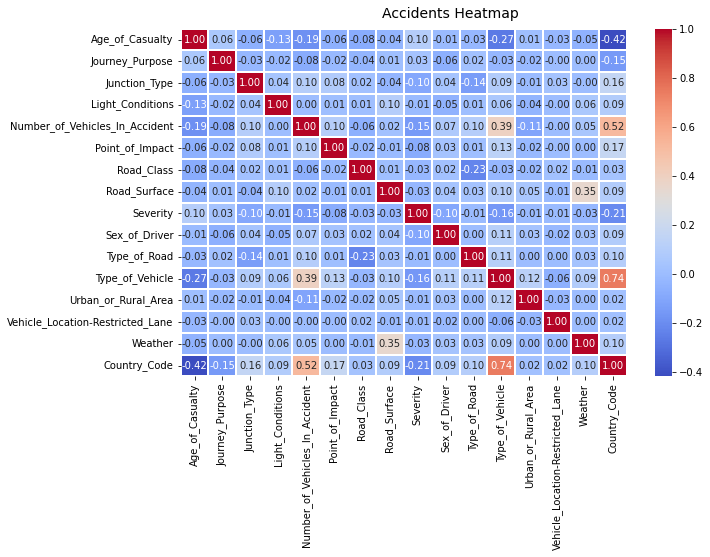

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
corr = joined.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Accidents Heatmap', fontsize=14)

# 1.  Como é que o país em questão afeta o número de acidentes?

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

Text(0.5, 1.0, 'Number of Accidents per Country')

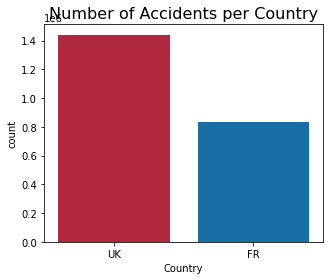

In [9]:
f, ax = plt.subplots(figsize=(5, 4))
sns.countplot('Country', order=joined['Country'].value_counts().index, data=joined, palette={ "UK" : "#C8102E", "FR" : "#0072BB"},ax=ax)
ax.set_title('Number of Accidents per Country', fontsize=16)
plt.show()

<AxesSubplot:xlabel='Country', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity With Country')

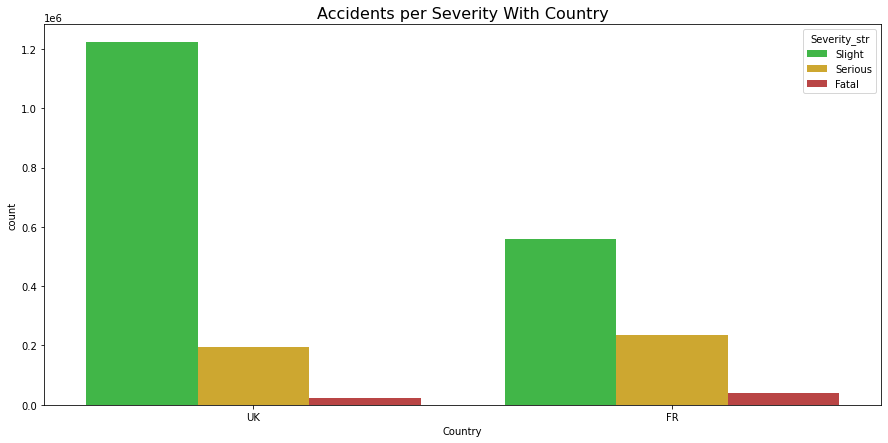

(0.0, 100.0)

Text(-0.4, 84.8556742618811, '84.86%')

Text(0.6, 66.9371238148743, '66.94%')

Text(-0.13333333333333333, 13.526480490526291, '13.53%')

Text(0.8666666666666667, 28.263432224855165, '28.26%')

Text(0.13333333333333336, 1.6178452475926037, '1.62%')

Text(1.1333333333333333, 4.799443960270529, '4.8%')

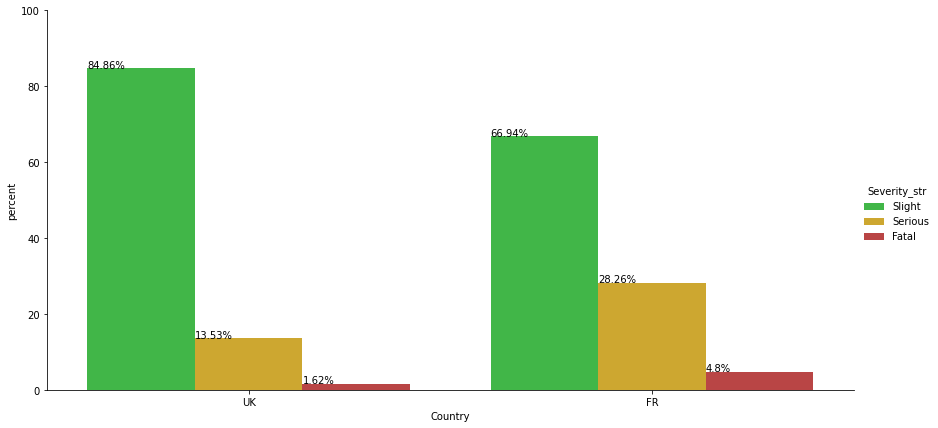

In [46]:
joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"


f, ax = plt.subplots(figsize=(15,7))
sns.countplot(x="Country", hue="Severity_str", data=joined, order=joined['Country'].value_counts().index, hue_order=joined['Severity_str'].value_counts().index,palette={ "Slight" : "#2dc937", "Serious" : "#e7b416", "Fatal" : "#cc3232"},ax=ax)
ax.set_title('Accidents per Severity With Country', fontsize=16)
plt.show()

#percentage
x,y = 'Country', 'Severity_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',height=6 ,aspect=2 ,data=df1, order=joined['Country'].value_counts().index ,palette={ "Slight" : "#2dc937", "Serious" : "#e7b416", "Fatal" : "#cc3232"})
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='Country', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity With Weather Conditions')

(0.0, 100.0)

Text(-0.4, 79.23691357330294, '79.24%')

Text(0.6000000000000001, 84.21240909734776, '84.21%')

Text(-2.7755575615628914e-17, 20.763086426697054, '20.76%')

Text(0.9999999999999999, 15.787590902652232, '15.79%')

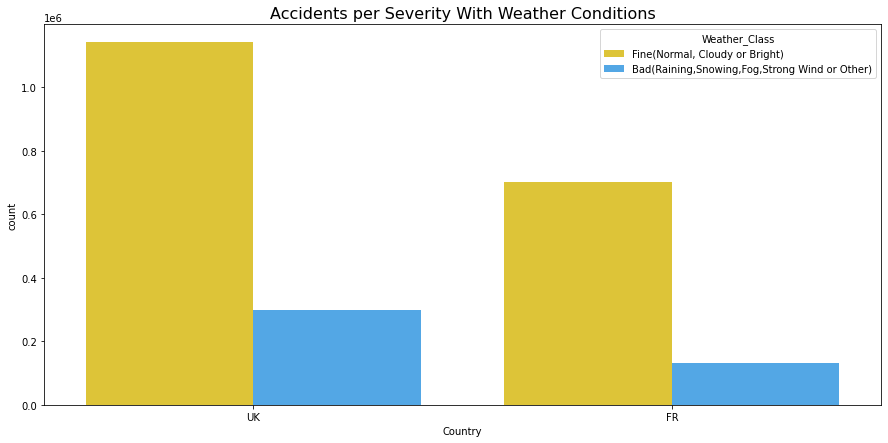

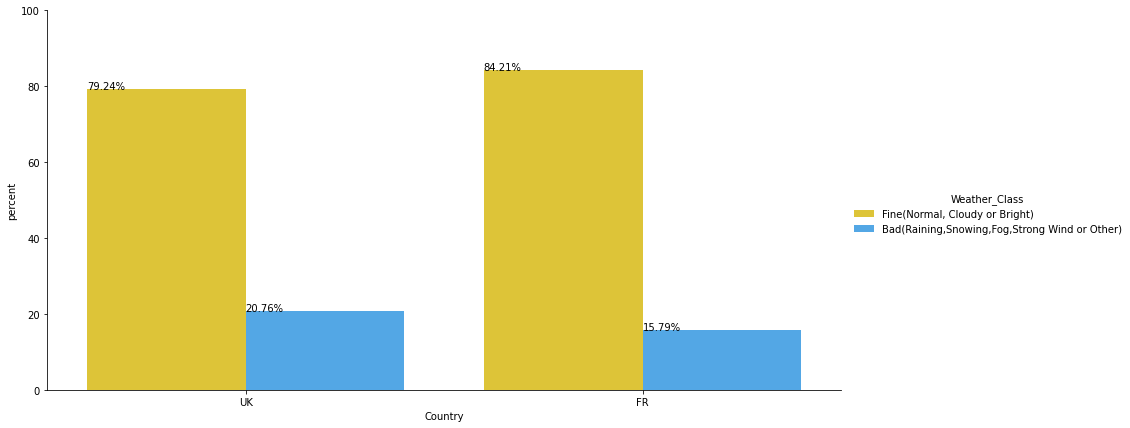

In [40]:
joined.loc[(joined['Weather'] == 1), 'Weather_Class'] = "Fine(Normal, Cloudy or Bright)"
joined.loc[(joined['Weather'] == 2) | (joined['Weather'] == 3) | (joined['Weather'] == 4) | (joined['Weather'] == 5) | (joined['Weather'] == 6), 'Weather_Class'] = "Bad(Raining,Snowing,Fog,Strong Wind or Other)"


f, ax = plt.subplots(figsize=(15,7))
sns.countplot(x="Country", hue="Weather_Class",  order=joined['Country'].value_counts().index,data=joined,palette={ "Fine(Normal, Cloudy or Bright)" : "#F9D71C", "Bad(Raining,Snowing,Fog,Strong Wind or Other)" : "#3BABFD"},ax=ax)
ax.set_title('Accidents per Severity With Weather Conditions', fontsize=16)

#percentage
x,y = 'Country', 'Weather_Class'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Country'].value_counts().index ,palette={ "Fine(Normal, Cloudy or Bright)" : "#F9D71C", "Bad(Raining,Snowing,Fog,Strong Wind or Other)" : "#3BABFD"})
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Weather_Class', 1)

# 2. Como é que o perfil do condutor afeta a severidade do acidente?

<AxesSubplot:xlabel='Age_of_Driver_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Sex and Country of the Driver')

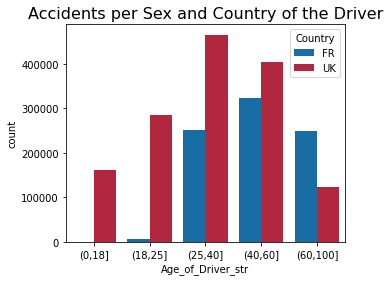

In [50]:
joined.loc[(joined['Age_of_Casualty'] <= 18), 'Age_of_Driver_str'] = "(0,18]"
joined.loc[(joined['Age_of_Casualty'] > 18) & (joined['Age_of_Casualty'] <= 25), 'Age_of_Driver_str'] = "(18,25]"
joined.loc[(joined['Age_of_Casualty'] > 25) & (joined['Age_of_Casualty'] <= 40), 'Age_of_Driver_str'] = "(25,40]"
joined.loc[(joined['Age_of_Casualty'] > 40) & (joined['Age_of_Casualty'] <= 60), 'Age_of_Driver_str'] = "(40,60]"
joined.loc[(joined['Age_of_Casualty'] > 60), 'Age_of_Driver_str'] = "(60,100]"


f, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Age_of_Driver_str", hue="Country", order = ["(0,18]","(18,25]","(25,40]", "(40,60]","(60,100]"], data=joined,palette={"UK" : "#C8102E", "FR" : "#0072BB"},ax=ax)
ax.set_title('Accidents per Sex and Country of the Driver', fontsize=16)
plt.show()

joined = joined.drop('Age_of_Driver_str', 1)

<AxesSubplot:xlabel='Age_of_Driver_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents Age Band and Sex of Driver')

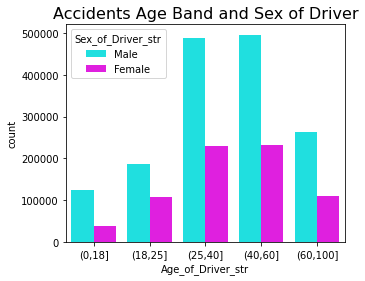

In [51]:
joined.loc[(joined['Sex_of_Driver'] == 1), 'Sex_of_Driver_str'] = "Male"
joined.loc[(joined['Sex_of_Driver'] == 2), 'Sex_of_Driver_str'] = "Female"

joined.loc[(joined['Age_of_Casualty'] <= 18), 'Age_of_Driver_str'] = "(0,18]"
joined.loc[(joined['Age_of_Casualty'] > 18) & (joined['Age_of_Casualty'] <= 25), 'Age_of_Driver_str'] = "(18,25]"
joined.loc[(joined['Age_of_Casualty'] > 25) & (joined['Age_of_Casualty'] <= 40), 'Age_of_Driver_str'] = "(25,40]"
joined.loc[(joined['Age_of_Casualty'] > 40) & (joined['Age_of_Casualty'] <= 60), 'Age_of_Driver_str'] = "(40,60]"
joined.loc[(joined['Age_of_Casualty'] > 60), 'Age_of_Driver_str'] = "(60,100]"
#group_by_age = pd.cut(joined["Age_of_Casualty"], [0,18,25,40,60,100]) 
#age_grouping = joined.groupby(group_by_age)['Fatal'].sum() 


f, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Age_of_Driver_str", hue="Sex_of_Driver_str", order=["(0,18]","(18,25]","(25,40]", "(40,60]","(60,100]"], data=joined,palette={"Male": "#00ffff", "Female": "#ff00ff"},ax=ax)
ax.set_title('Accidents Age Band and Sex of Driver', fontsize=16)
plt.show()

joined = joined.drop('Sex_of_Driver_str', 1)
joined = joined.drop('Age_of_Driver_str', 1)

<AxesSubplot:xlabel='Severity_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity per Sex of the Driver')

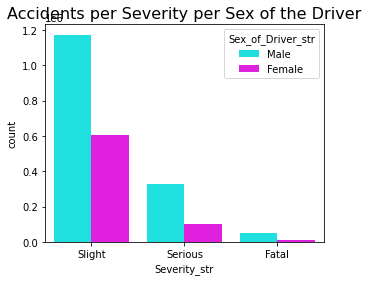

In [15]:
joined.loc[(joined['Sex_of_Driver'] == 1), 'Sex_of_Driver_str'] = "Male"
joined.loc[(joined['Sex_of_Driver'] == 2), 'Sex_of_Driver_str'] = "Female"

joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(5,4))
sns.countplot(x="Severity_str", hue="Sex_of_Driver_str", order=joined['Severity_str'].value_counts().index, data=joined,palette={"Male": "#00ffff", "Female": "#ff00ff"},ax=ax)
ax.set_title('Accidents per Severity per Sex of the Driver', fontsize=16)
plt.show()

joined = joined.drop('Sex_of_Driver_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:ylabel='Fatal'>

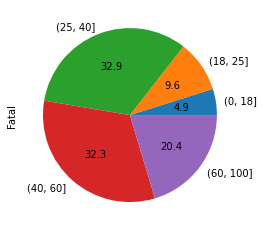

<AxesSubplot:ylabel='Serious'>

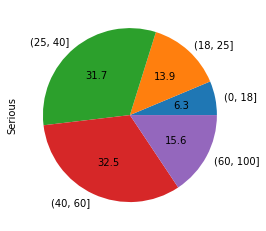

<AxesSubplot:ylabel='Slight'>

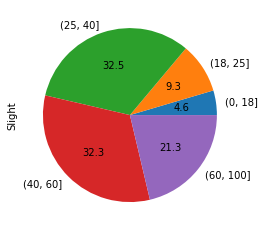

In [16]:
joined.loc[((joined['Severity'] == 1) | (joined['Severity'] == 2)), 'Fatal'] = 1
joined.loc[(joined['Severity'] == 3), 'Fatal'] = 0

joined.loc[((joined['Severity'] == 3) | (joined['Severity'] == 1)), 'Serious'] = 1
joined.loc[(joined['Severity'] == 2), 'Serious'] = 0

joined.loc[((joined['Severity'] == 3) | (joined['Severity'] == 2)), 'Slight'] = 1
joined.loc[(joined['Severity'] == 1), 'Fatal'] = 0

group_by_age = pd.cut(joined["Age_of_Casualty"], [0,18,25,40,60,100]) 
age_grouping = joined.groupby(group_by_age)['Fatal'].sum()
(age_grouping/age_grouping.sum()).plot(kind='pie',autopct='%.1f')
plt.show()

age_grouping = joined.groupby(group_by_age)['Serious'].sum()
(age_grouping/age_grouping.sum()).plot(kind='pie',autopct='%.1f')
plt.show()

age_grouping = joined.groupby(group_by_age)['Slight'].sum()
(age_grouping/age_grouping.sum()).plot(kind='pie',autopct='%.1f')
plt.show()


joined = joined.drop('Fatal', 1)
joined = joined.drop('Slight', 1)
joined = joined.drop('Serious', 1)

<AxesSubplot:ylabel='Fatal'>

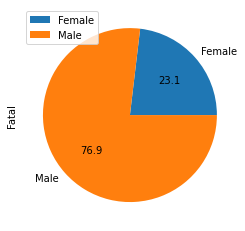

<AxesSubplot:ylabel='Serious'>

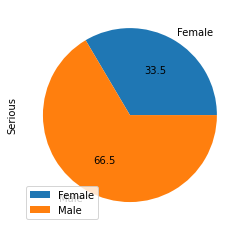

<AxesSubplot:ylabel='Slight'>

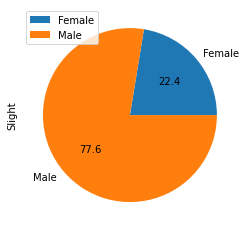

In [52]:
joined.loc[((joined['Severity'] == 1) | (joined['Severity'] == 2)), 'Fatal'] = 1
joined.loc[(joined['Severity'] == 3), 'Fatal'] = 0

joined.loc[((joined['Severity'] == 3) | (joined['Severity'] == 1)), 'Serious'] = 1
joined.loc[(joined['Severity'] == 2), 'Serious'] = 0

joined.loc[((joined['Severity'] == 3) | (joined['Severity'] == 2)), 'Slight'] = 1
joined.loc[(joined['Severity'] == 1), 'Fatal'] = 0

joined.loc[(joined['Sex_of_Driver'] == 1), 'Sex_of_Driver_str'] = "Male"
joined.loc[(joined['Sex_of_Driver'] == 2), 'Sex_of_Driver_str'] = "Female"

joined.groupby(['Sex_of_Driver_str']).sum().plot(kind='pie', y='Fatal' ,autopct='%.1f')
plt.show()

joined.groupby(['Sex_of_Driver_str']).sum().plot(kind='pie', y='Serious', autopct='%.1f')
plt.show()

joined.groupby(['Sex_of_Driver_str']).sum().plot(kind='pie', y='Slight', autopct='%.1f')
plt.show()


joined = joined.drop('Sex_of_Driver_str', 1)
joined = joined.drop('Fatal', 1)
joined = joined.drop('Serious', 1)
joined = joined.drop('Slight', 1)

<AxesSubplot:xlabel='Age_of_Casualty'>

<AxesSubplot:xlabel='Age_of_Casualty'>

<AxesSubplot:xlabel='Age_of_Casualty'>

<AxesSubplot:xlabel='Age_of_Casualty'>

<AxesSubplot:xlabel='Age_of_Casualty'>

<AxesSubplot:xlabel='Age_of_Casualty'>

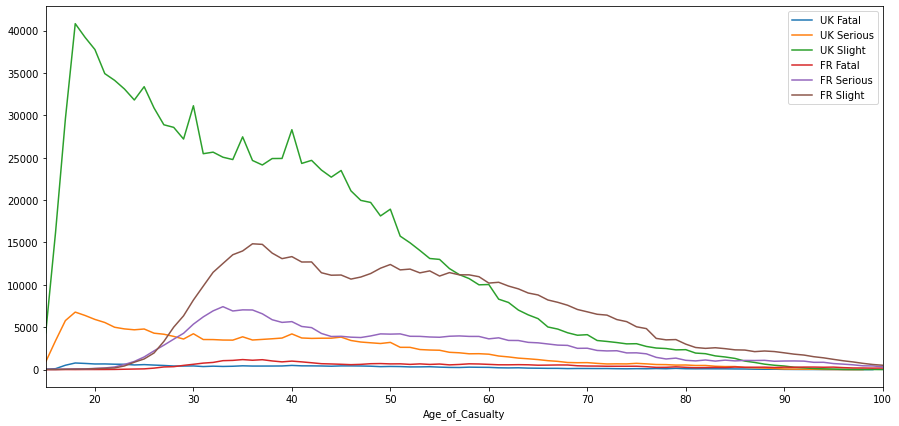

In [18]:
df1_1 = joined[(joined["Country"]=="UK") & (joined["Severity"]==3)]
df1_2 = joined[(joined["Country"]=="UK") & (joined["Severity"]==2)]
df1_3 = joined[(joined["Country"]=="UK") & (joined["Severity"]==1)]
df2_1 = joined[(joined["Country"]=="FR") & (joined["Severity"]==3)]
df2_2 = joined[(joined["Country"]=="FR") & (joined["Severity"]==2)]
df2_3 = joined[(joined["Country"]=="FR") & (joined["Severity"]==1)]


df1_1.groupby([df1_1["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='UK Fatal', legend=True)
df1_2.groupby([df1_2["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='UK Serious', legend=True)
df1_3.groupby([df1_3["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='UK Slight', legend=True)
df2_1.groupby([df2_1["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='FR Fatal', legend=True)
df2_2.groupby([df2_2["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='FR Serious', legend=True)
df2_3.groupby([df2_3["Age_of_Casualty"]])["Age_of_Casualty"].count().plot(kind='line', figsize=(15,7),xlim=[15,100], label='FR Slight', legend=True)

Como se pode ver pelos primeiros gráficos, a gama de idade com mais acidentes, tanto no UK como na FR, é dos 25 aos 60, algo que era esperado uma vez que são as idades onde é mais esperado se conduzir.
Nota-se que os homens têm mais acidentes que as mulheres, chegando a ultrapassar o dobro do número dos 25 aos 60.
Não só têm mais acidentes, como têm um maior número de acidentes fatais.

Os condutores na FR são muito mais perigosos a conduzir, uma vez que são responsáveis por mais acidentes fatais e severos, já no UK existem bastantes mais acidentes, sendo a grande maioria ligeiros.

Com os gráficos obtidos é possivel verificar que os homens dos 24 aos 40 a conduzir na França são os condutores mais perigosos uma vez que são os que têm mais acidentes fatais, mas que os condutores do UK dos 15 aos 55 são os mais descuidados, derivado do elevado número de acidentes ligeiros.

# 3. Como é que a estrada afeta a severidade dos acidentes?

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Road Surface')

(0.0, 100.0)

Text(-0.4, 70.62838321509523, '70.63%')

Text(0.5999999999999999, 74.48560053363207, '74.49%')

Text(1.5999999999999999, 73.33364937897032, '73.33%')

Text(-0.3, 26.15699354176055, '26.16%')

Text(0.7, 22.517832282415938, '22.52%')

Text(1.7, 23.83458171359944, '23.83%')

Text(-0.2, 2.0518142517286213, '2.05%')

Text(0.7999999999999999, 1.6722485758577974, '1.67%')

Text(1.8, 1.52650042666161, '1.53%')

Text(-0.09999999999999999, 0.25037336872423077, '0.25%')

Text(0.8999999999999999, 0.4850566751654236, '0.49%')

Text(1.9, 0.5388578110679182, '0.54%')

Text(-1.3877787807814457e-17, 0.6866163747329669, '0.69%')

Text(1.0, 0.498536927757467, '0.5%')

Text(1.9999999999999998, 0.407698871717076, '0.41%')

Text(0.09999999999999996, 0.07950590591220524, '0.08%')

Text(1.0999999999999999, 0.18314550073327926, '0.18%')

Text(2.1, 0.16908441578964004, '0.17%')

Text(0.20000000000000004, 0.131311167573727, '0.13%')

Text(1.2, 0.11179312925470473, '0.11%')

Text(2.2, 0.1422205366454916, '0.14%')

Text(0.30000000000000004, 0.015002174472479717, '0.02%')

Text(1.3, 0.045786375183319815, '0.05%')

Text(2.3000000000000003, 0.0474068455484972, '0.05%')

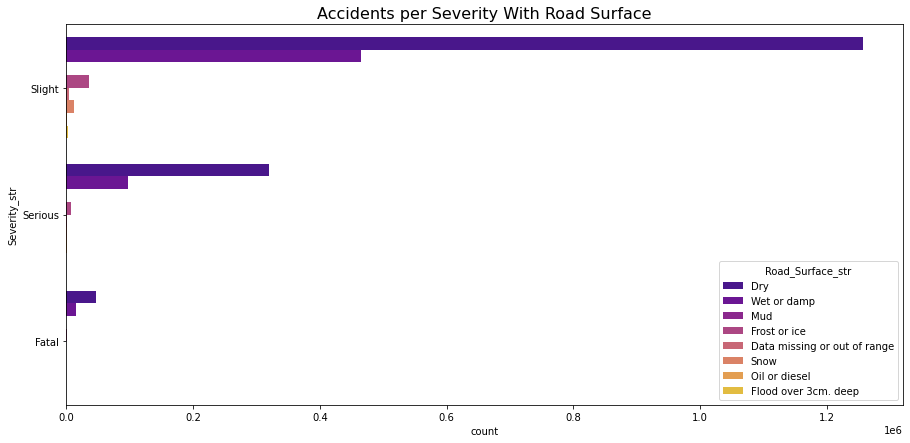

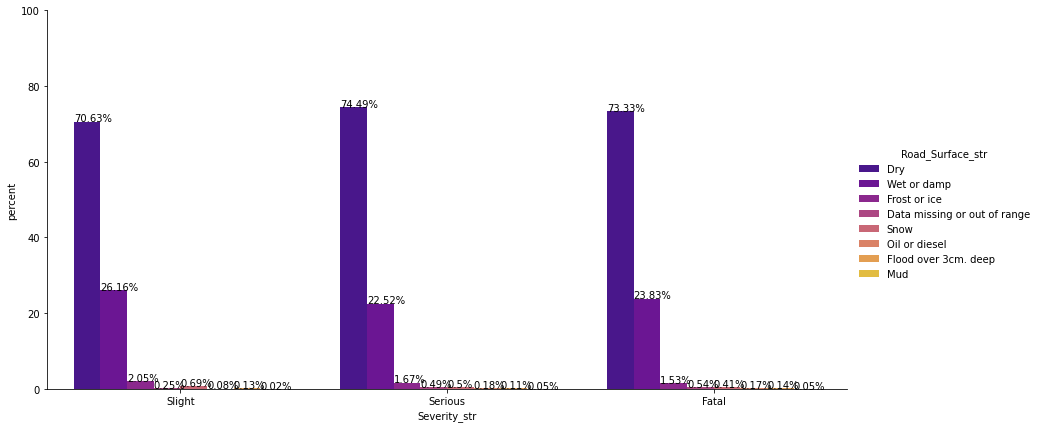

In [19]:
joined.loc[(joined['Road_Surface'] == 1), 'Road_Surface_str'] = "Dry"
joined.loc[(joined['Road_Surface'] == 2), 'Road_Surface_str'] = "Wet or damp"
joined.loc[(joined['Road_Surface'] == 3), 'Road_Surface_str'] = "Flood over 3cm. deep"
joined.loc[(joined['Road_Surface'] == 4), 'Road_Surface_str'] = "Snow"
joined.loc[(joined['Road_Surface'] == 5), 'Road_Surface_str'] = "Mud"
joined.loc[(joined['Road_Surface'] == 6), 'Road_Surface_str'] = "Frost or ice"
joined.loc[(joined['Road_Surface'] == 7), 'Road_Surface_str'] = "Oil or diesel"
joined.loc[(joined['Road_Surface'] == -1), 'Road_Surface_str'] = "Data missing or out of range"


joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Road_Surface_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Road Surface', fontsize=16)

#percentage
x,y = 'Severity_str', 'Road_Surface_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index,palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Road_Surface_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Road Class')

(0.0, 100.0)

Text(-0.39999999999999997, 24.836577436504843, '24.84%')

Text(0.6000000000000001, 43.49287289748733, '43.49%')

Text(1.6, 50.44720457634082, '50.45%')

Text(-0.2666666666666666, 36.46652155200024, '36.47%')

Text(0.7333333333333334, 28.359662435881646, '28.36%')

Text(1.7333333333333334, 31.220568250055308, '31.22%')

Text(-0.13333333333333325, 12.903836623510598, '12.9%')

Text(0.8666666666666667, 11.567916069158345, '11.57%')

Text(1.8666666666666667, 7.142631395973578, '7.14%')

Text(9.71445146547012e-17, 7.676168793004829, '7.68%')

Text(1.0000000000000002, 5.325397028301558, '5.33%')

Text(2.0, 6.355677759868525, '6.36%')

Text(0.13333333333333344, 17.518213314064624, '17.52%')

Text(1.1333333333333335, 10.421862180686517, '10.42%')

Text(2.1333333333333333, 4.419898233304889, '4.42%')

Text(0.2666666666666667, 0.5986822809148742, '0.6%')

Text(1.2666666666666668, 0.8322893884846104, '0.83%')

Text(2.2666666666666666, 0.4140197844568756, '0.41%')

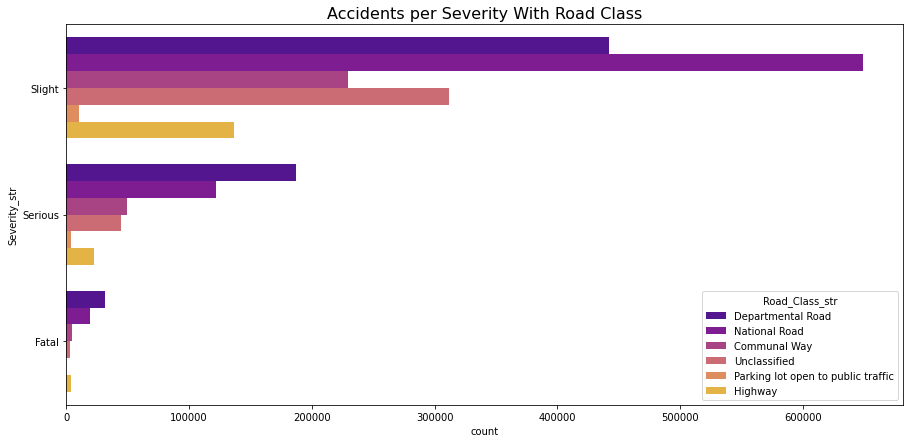

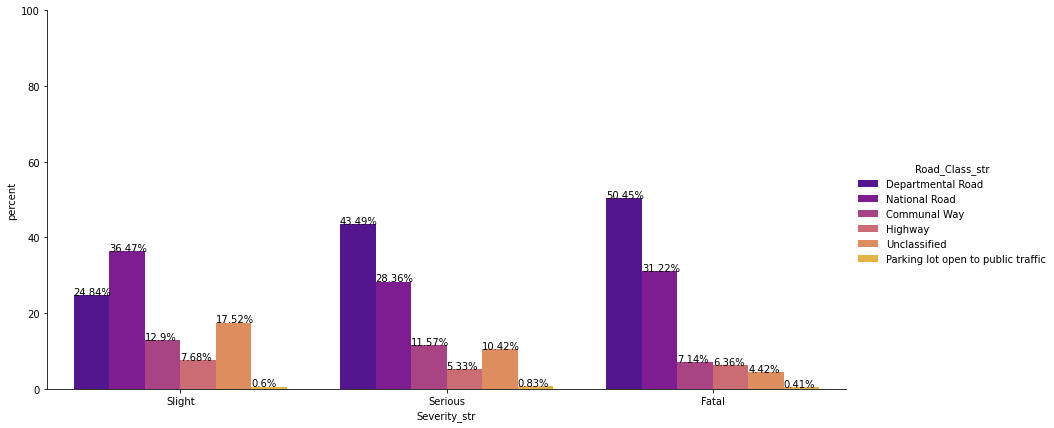

In [20]:
joined.loc[(joined['Road_Class'] == 1), 'Road_Class_str'] = "Highway"
joined.loc[(joined['Road_Class'] == 2), 'Road_Class_str'] = "National Road"
joined.loc[(joined['Road_Class'] == 3), 'Road_Class_str'] = "Departmental Road"
joined.loc[(joined['Road_Class'] == 4), 'Road_Class_str'] = "Communal Way"
joined.loc[(joined['Road_Class'] == 5), 'Road_Class_str'] = "Unclassified"
joined.loc[(joined['Road_Class'] == 6), 'Road_Class_str'] = "Parking lot open to public traffic"


joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Road_Class_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Road Class', fontsize=16)

#percentage
x,y = 'Severity_str', 'Road_Class_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index,palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Road_Class_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Junction Type')

(0.0, 100.0)

Text(-0.4, 50.27470273781256, '50.27%')

Text(0.5999999999999999, 67.55512377428478, '67.56%')

Text(1.5999999999999999, 81.26323441104896, '81.26%')

Text(-0.3, 23.336303801337497, '23.34%')

Text(0.7, 15.17434847382623, '15.17%')

Text(1.7, 8.093928763313423, '8.09%')

Text(-0.2, 6.843463827903146, '6.84%')

Text(0.7999999999999999, 6.613458405286118, '6.61%')

Text(1.8, 5.929016149932051, '5.93%')

Text(-0.09999999999999999, 7.28184197484804, '7.28%')

Text(0.8999999999999999, 4.20932508093962, '4.21%')

Text(1.9, 2.1427894187920735, '2.14%')

Text(-1.3877787807814457e-17, 8.361886161027835, '8.36%')

Text(1.0, 3.942276628728278, '3.94%')

Text(1.9999999999999998, 1.2230966151512277, '1.22%')

Text(0.09999999999999996, 2.8560881296277776, '2.86%')

Text(1.0999999999999999, 1.9811322947341021, '1.98%')

Text(2.1, 1.1393445213488829, '1.14%')

Text(0.20000000000000004, 1.044814360733185, '1.04%')

Text(1.2, 0.5241029240527217, '0.52%')

Text(2.2, 0.203849435858538, '0.2%')

Text(0.30000000000000004, 0.0008990067099613314, '0.0%')

Text(1.3, 0.00023241814813867927, '0.0%')

Text(2.3000000000000003, 0.00474068455484972, '0.0%')

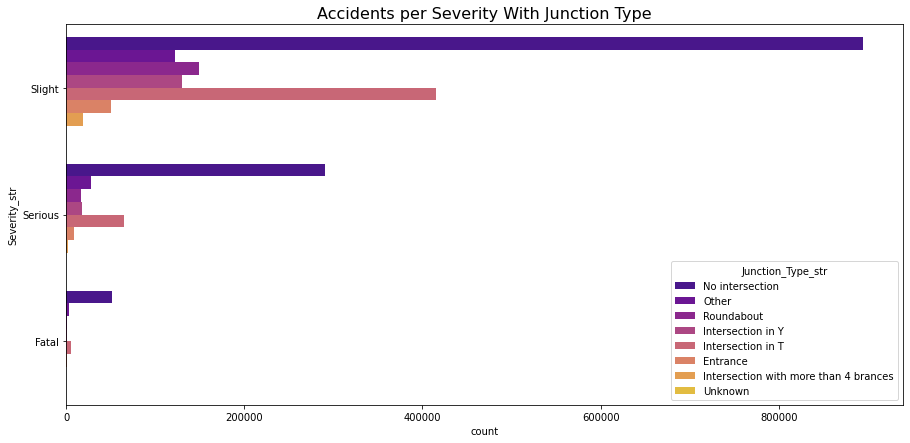

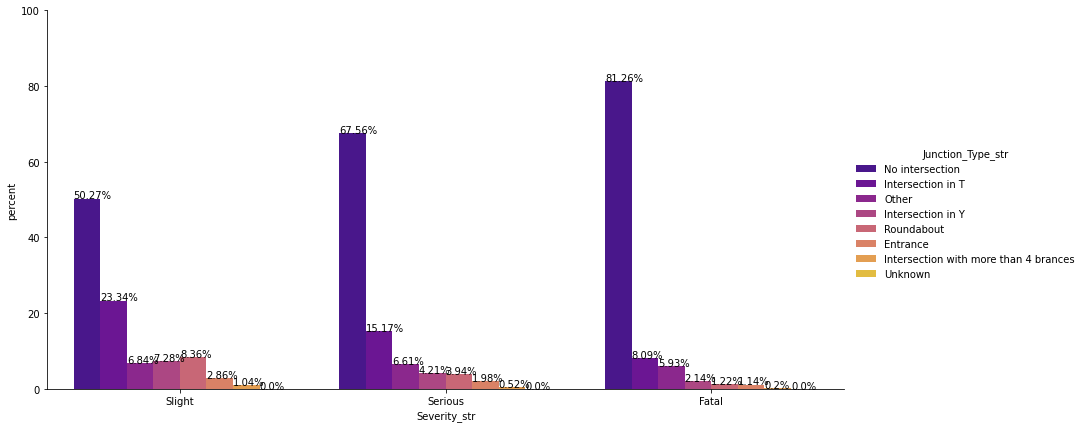

In [21]:
joined.loc[(joined['Junction_Type'] == 0), 'Junction_Type_str'] = "No intersection"
joined.loc[(joined['Junction_Type'] == 1), 'Junction_Type_str'] = "Intersection in T"
joined.loc[(joined['Junction_Type'] == 2), 'Junction_Type_str'] = "Intersection in Y"
joined.loc[(joined['Junction_Type'] == 3), 'Junction_Type_str'] = "Intersection with more than 4 brances"
joined.loc[(joined['Junction_Type'] == 4), 'Junction_Type_str'] = "Roundabout"
joined.loc[(joined['Junction_Type'] == 5), 'Junction_Type_str'] = "Entrance"
joined.loc[(joined['Junction_Type'] == 6), 'Junction_Type_str'] = "Other"
joined.loc[(joined['Junction_Type'] == -1), 'Junction_Type_str'] = "Unknown"

joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Junction_Type_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Junction Type', fontsize=16)

#percentage
x,y = 'Severity_str', 'Junction_Type_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index,palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Junction_Type_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Junction Type')

(0.0, 100.0)

Text(-0.4, 72.48752909129526, '72.49%')

Text(0.6, 81.07628196040059, '81.08%')

Text(1.5999999999999999, 82.27932113397175, '82.28%')

Text(-0.2, 16.8649163755196, '16.86%')

Text(0.8, 11.59836284656451, '11.6%')

Text(1.7999999999999998, 13.420877974779557, '13.42%')

Text(2.7755575615628914e-17, 9.02366747539812, '9.02%')

Text(1.0, 4.918897687207008, '4.92%')

Text(2.0, 2.273948358142916, '2.27%')

Text(0.20000000000000007, 1.6238870577870275, '1.62%')

Text(1.2000000000000002, 2.406457505827885, '2.41%')

Text(2.1999999999999997, 2.0258525331057804, '2.03%')

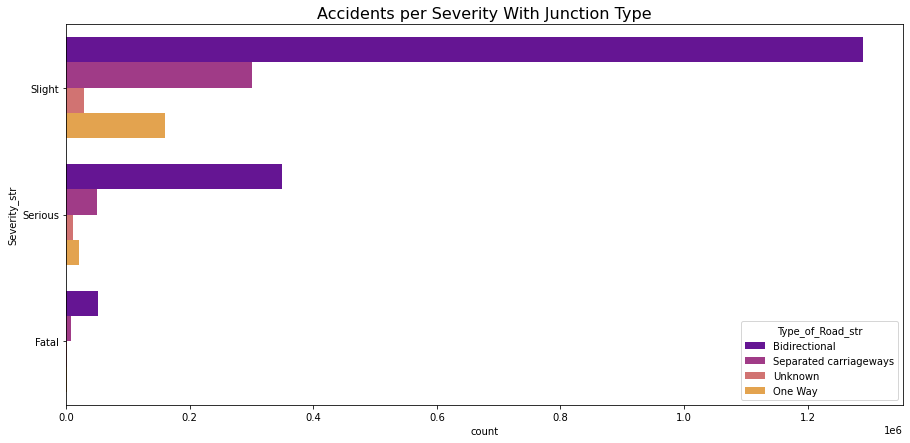

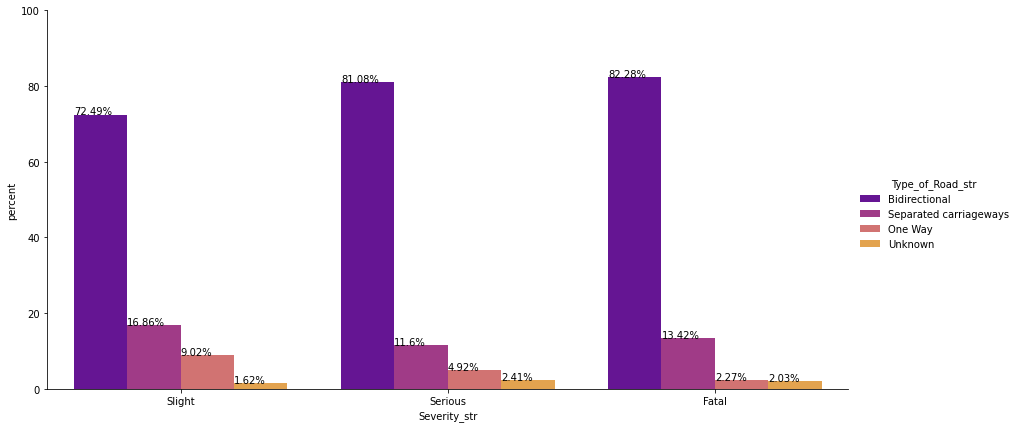

In [55]:
joined.loc[(joined['Type_of_Road'] == 1), 'Type_of_Road_str'] = "One Way"
joined.loc[(joined['Type_of_Road'] == 2), 'Type_of_Road_str'] = "Bidirectional"
joined.loc[(joined['Type_of_Road'] == 3), 'Type_of_Road_str'] = "Separated carriageways"
joined.loc[(joined['Type_of_Road'] == -1), 'Type_of_Road_str'] = "Unknown"


joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Type_of_Road_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Junction Type', fontsize=16)

#percentage
x,y = 'Severity_str', 'Type_of_Road_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index,palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Type_of_Road_str', 1)
joined = joined.drop('Severity_str', 1)

# 4. Como é que as condições atmosféricas afeta a severidade dos acidentes?

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Weather Conditions')

(0.0, 100.0)

Text(-0.39999999999999997, 80.36673265501878, '80.37%')

Text(0.6000000000000001, 83.58876740856437, '83.59%')

Text(1.6, 83.37336831126142, '83.37%')

Text(-0.2666666666666666, 12.329238983663247, '12.33%')

Text(0.7333333333333334, 10.990173109462448, '10.99%')

Text(1.7333333333333334, 10.569234173014317, '10.57%')

Text(-0.13333333333333325, 3.1975037185176274, '3.2%')

Text(0.8666666666666667, 2.0167438314646438, '2.02%')

Text(1.8666666666666667, 2.0370428901039856, '2.04%')

Text(9.71445146547012e-17, 1.1024906060720148, '1.1%')

Text(1.0000000000000002, 1.1760658968780795, '1.18%')

Text(2.0, 1.7573248206327636, '1.76%')

Text(0.13333333333333344, 1.9690864331282132, '1.97%')

Text(1.1333333333333335, 1.4284784589353117, '1.43%')

Text(2.1333333333333333, 1.5344985619014508, '1.53%')

Text(0.2666666666666667, 1.0349476036001206, '1.03%')

Text(1.2666666666666668, 0.7997712946951526, '0.8%')

Text(2.2666666666666666, 0.7285312430860647, '0.73%')

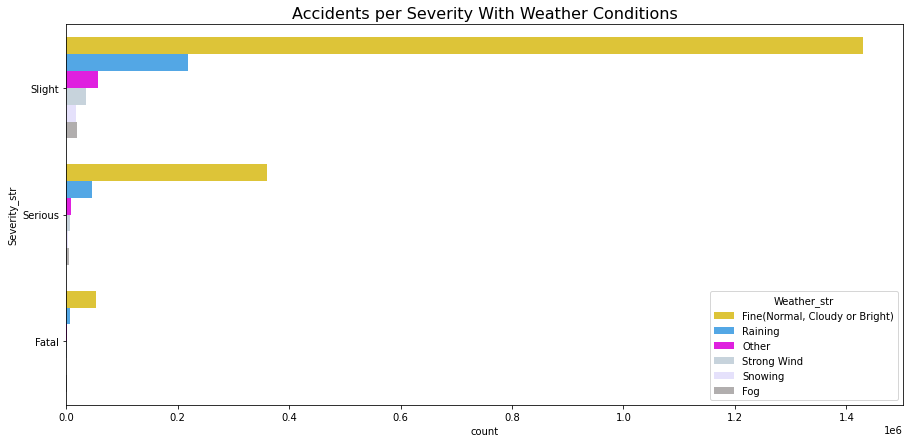

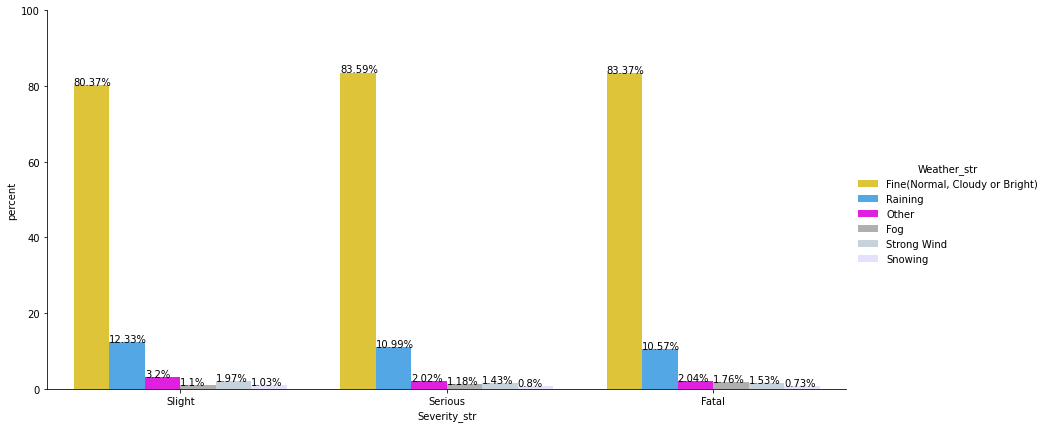

In [22]:
joined.loc[(joined['Weather'] == 1), 'Weather_str'] = "Fine(Normal, Cloudy or Bright)"
joined.loc[(joined['Weather'] == 2), 'Weather_str'] = "Raining"
joined.loc[(joined['Weather'] == 3), 'Weather_str'] = "Snowing"
joined.loc[(joined['Weather'] == 4), 'Weather_str'] = "Fog"
joined.loc[(joined['Weather'] == 5), 'Weather_str'] = "Strong Wind"
joined.loc[(joined['Weather'] == 6), 'Weather_str'] = "Other"


joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Weather_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette={"Fine(Normal, Cloudy or Bright)": "#F9D71C", "Raining": "#3BABFD", "Snowing": "#E2DDFF", "Fog": "#b1aeae", "Strong Wind": "#C4D3DF", "Other": "#ff00ff"},ax=ax)
ax.set_title('Accidents per Severity With Weather Conditions', fontsize=16)

#percentage
x,y = 'Severity_str', 'Weather_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index ,palette={"Fine(Normal, Cloudy or Bright)": "#F9D71C", "Raining": "#3BABFD", "Snowing": "#E2DDFF", "Fog": "#b1aeae", "Strong Wind": "#C4D3DF", "Other": "#ff00ff"})
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Weather_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='count', ylabel='Severity_str'>

Text(0.5, 1.0, 'Accidents per Severity With Light Conditions')

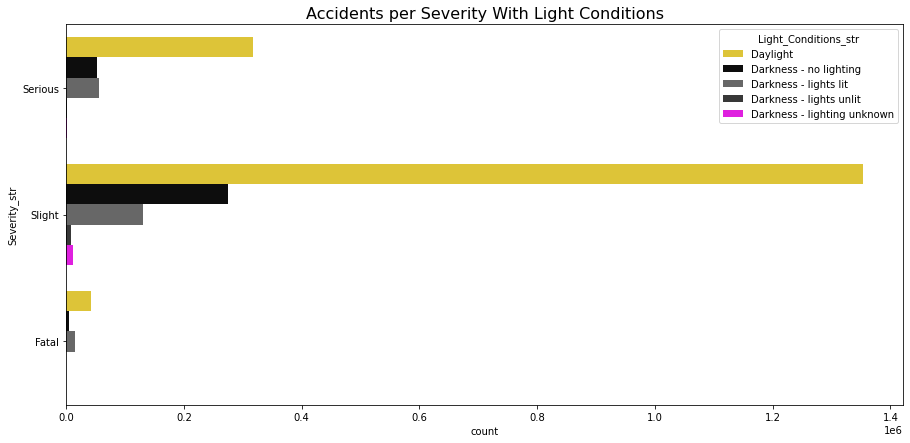

(0.0, 100.0)

Text(-0.4, 76.07192503183046, '76.07%')

Text(0.6, 73.76626636514285, '73.77%')

Text(1.5999999999999999, 67.20394424954964, '67.2%')

Text(-0.24, 7.314655719761628, '7.31%')

Text(0.76, 13.084212067615086, '13.08%')

Text(1.76, 22.906987769033847, '22.91%')

Text(-0.08, 15.443755330828852, '15.44%')

Text(0.92, 12.250295752093507, '12.25%')

Text(1.92, 9.018362251509119, '9.02%')

Text(0.07999999999999999, 0.4784963213769187, '0.48%')

Text(1.0799999999999998, 0.4850566751654236, '0.49%')

Text(2.08, 0.543598495622768, '0.54%')

Text(0.24000000000000002, 0.6911675962021462, '0.69%')

Text(1.24, 0.4141691399831265, '0.41%')

Text(2.2399999999999998, 0.32710723428463073, '0.33%')

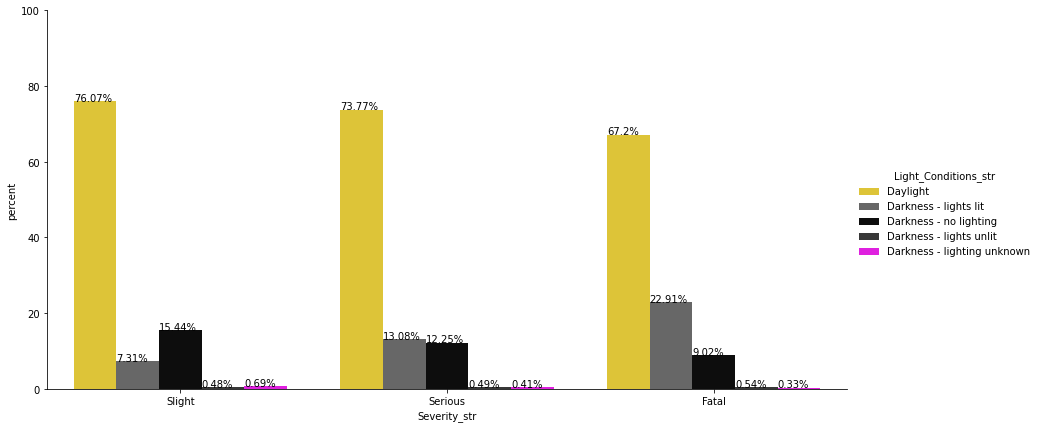

In [23]:
joined.loc[(joined['Light_Conditions'] == 1), 'Light_Conditions_str'] = "Daylight"
joined.loc[(joined['Light_Conditions'] == 2), 'Light_Conditions_str'] = "Darkness - lights lit"
joined.loc[(joined['Light_Conditions'] == 3), 'Light_Conditions_str'] = "Darkness - lights unlit"
joined.loc[(joined['Light_Conditions'] == 4), 'Light_Conditions_str'] = "Darkness - no lighting"
joined.loc[(joined['Light_Conditions'] == -1), 'Light_Conditions_str'] = "Darkness - lighting unknown"

joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"


f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Severity_str", hue="Light_Conditions_str", data=joined,palette={"Daylight": "#F9D71C", "Darkness - lights lit": "#676767", "Darkness - lights unlit": "#383838", "Darkness - no lighting": "#0D0D0D", "Darkness - lighting unknown": "#ff00ff"},ax=ax)
ax.set_title('Accidents per Severity With Light Conditions', fontsize=16)
plt.show()

#percentage
x,y = 'Severity_str', 'Light_Conditions_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',height=6 ,aspect=2 ,data=df1, order=joined['Severity_str'].value_counts().index ,palette={"Daylight": "#F9D71C", "Darkness - lights lit": "#676767", "Darkness - lights unlit": "#383838", "Darkness - no lighting": "#0D0D0D", "Darkness - lighting unknown": "#ff00ff"})
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Light_Conditions_str', 1)
joined = joined.drop('Severity_str', 1)

<AxesSubplot:xlabel='Severity_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity With Light Conditions')

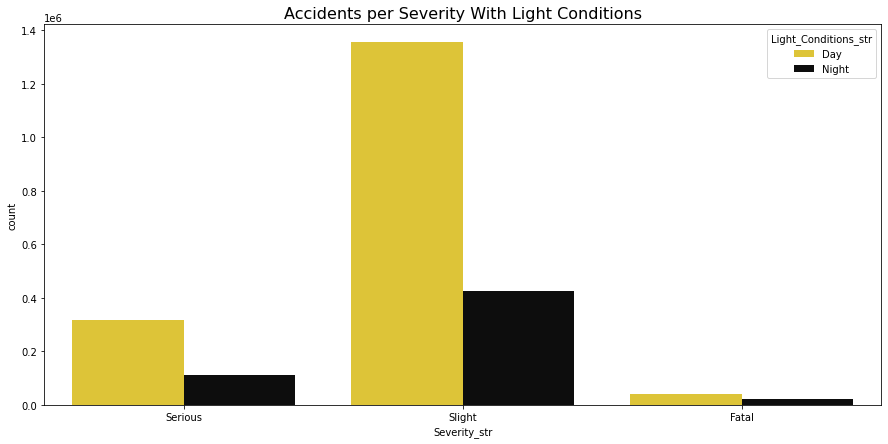

(0.0, 100.0)

Text(-0.4, 76.07192503183046, '76.07%')

Text(0.6000000000000001, 73.76626636514285, '73.77%')

Text(1.6, 67.20394424954964, '67.2%')

Text(-2.7755575615628914e-17, 23.928074968169543, '23.93%')

Text(0.9999999999999999, 26.233733634857142, '26.23%')

Text(2.0, 32.796055750450364, '32.8%')

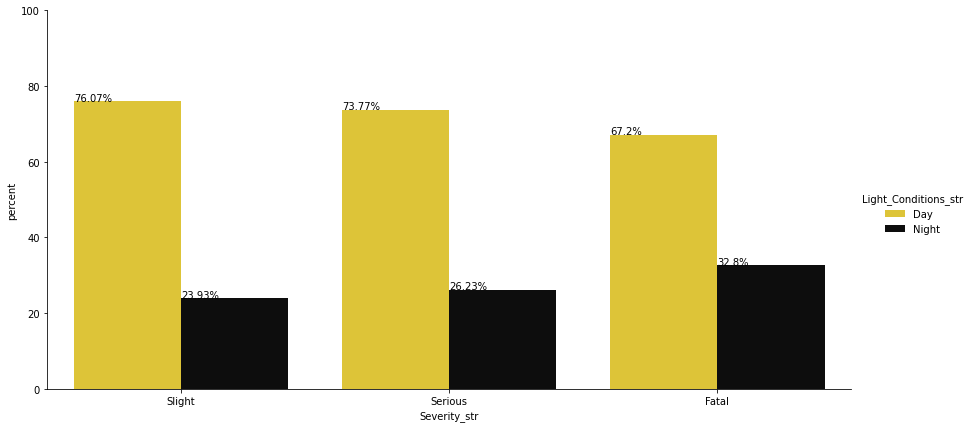

In [57]:
joined.loc[(joined['Light_Conditions'] == 1), 'Light_Conditions_str'] = "Day"
joined.loc[(joined['Light_Conditions'] == 2) | (joined['Light_Conditions'] == 3) | (joined['Light_Conditions'] == 4) | (joined['Light_Conditions'] == -1), 'Light_Conditions_str'] = "Night"

joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"


f, ax = plt.subplots(figsize=(15,7))
sns.countplot(x="Severity_str", hue="Light_Conditions_str", data=joined,palette={"Day": "#F9D71C", "Night": "#0D0D0D"},ax=ax)
ax.set_title('Accidents per Severity With Light Conditions', fontsize=16)
plt.show()

#percentage
x,y = 'Severity_str', 'Light_Conditions_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',height=6 ,aspect=2 ,data=df1, order=joined['Severity_str'].value_counts().index ,palette={"Day": "#F9D71C", "Night": "#0D0D0D"})
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Light_Conditions_str', 1)
joined = joined.drop('Severity_str', 1)

# 5. Como é que o número de acidentes evolui com o tempo?

<AxesSubplot:xlabel='Date,Date'>

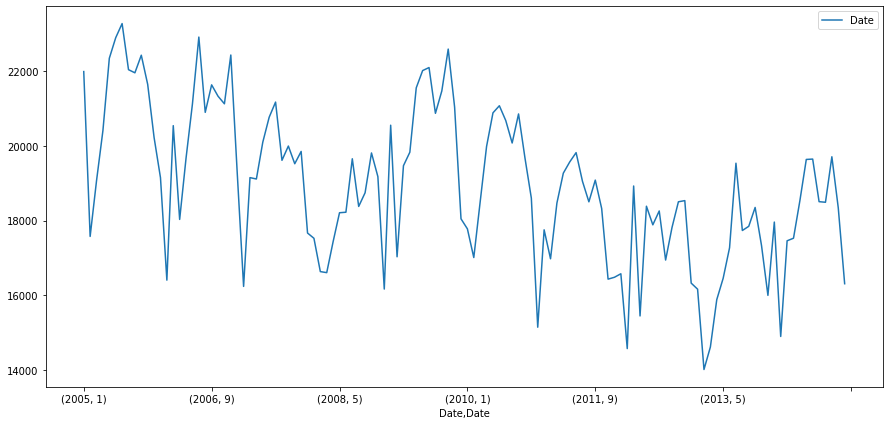

In [58]:
df1 = joined.groupby([joined["Date"].dt.year, joined["Date"].dt.month])["Date"].count()

df1.plot(kind='line', figsize=(15,7), legend=True)

<AxesSubplot:xlabel='Date,Date'>

<AxesSubplot:xlabel='Date,Date'>

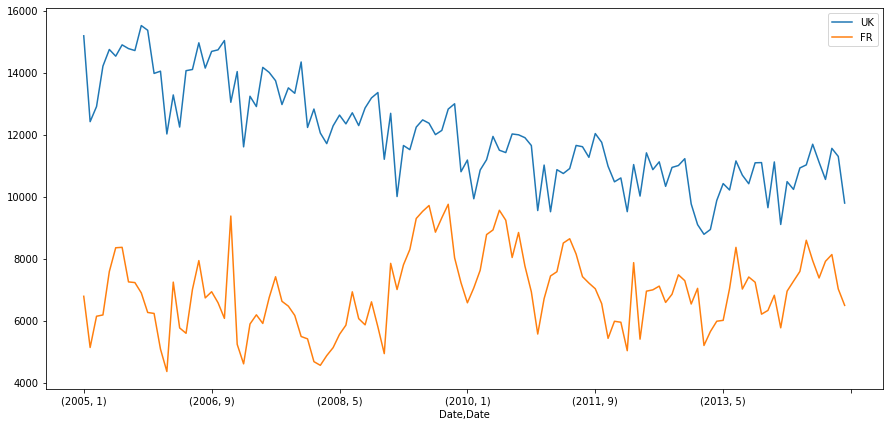

In [24]:
df1 = joined[joined["Country"]=="UK"]
df2 = joined[joined["Country"]=="FR"]
df1_2 = df1.groupby([df1["Date"].dt.year, df1["Date"].dt.month])["Date"].count()
df2_2 = df2.groupby([df2["Date"].dt.year, df2["Date"].dt.month])["Date"].count()

df1_2.plot(kind='line', figsize=(15,7), label='UK', legend=True)
df2_2.plot(kind='line', figsize=(15,7), label='FR', legend=True)

<AxesSubplot:xlabel='Season'>

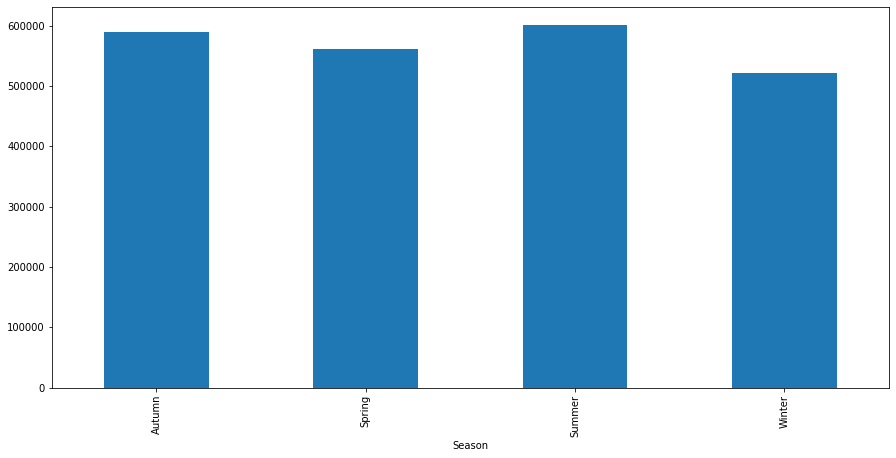

In [61]:
joined.loc[(joined["Date"].dt.month >= 6) & (joined["Date"].dt.month <= 8), 'Season'] = "Summer"
joined.loc[(joined["Date"].dt.month >= 3) & (joined["Date"].dt.month <= 5), 'Season'] = "Spring"
joined.loc[(joined["Date"].dt.month >= 9) & (joined["Date"].dt.month <= 11), 'Season'] = "Autumn"
joined.loc[(joined["Date"].dt.month == 12) | (joined["Date"].dt.month == 1) | (joined["Date"].dt.month == 2), 'Season'] = "Winter"

#df1 = joined[joined["Country"]=="UK"]
#df2 = joined[joined["Country"]=="FR"]

df1_2 = joined.groupby([joined["Season"]])["Season"].count()
#df2_2 = df2.groupby([df2["Season"]])["Season"].count()

df1_2.plot(kind='bar', figsize=(15,7))
#df2_2.plot(kind='bar', figsize=(15,7), label='FR')

joined = joined.drop('Season', 1)

<AxesSubplot:xlabel='Season'>

<AxesSubplot:xlabel='Season'>

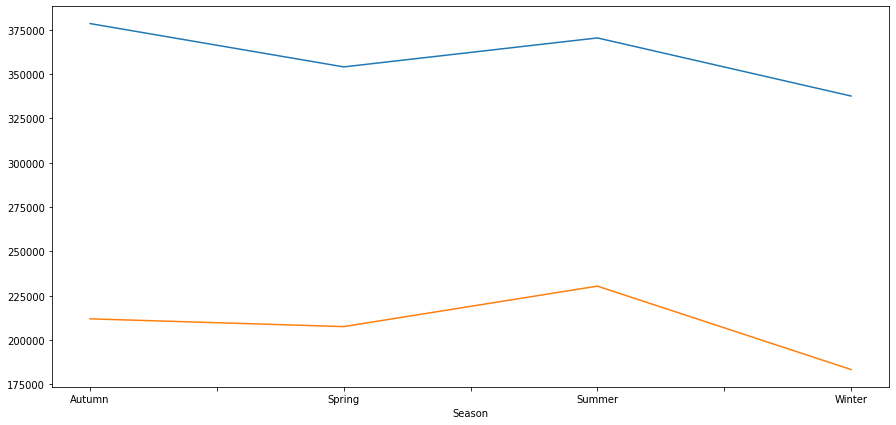

In [60]:
joined.loc[(joined["Date"].dt.month >= 6) & (joined["Date"].dt.month <= 8), 'Season'] = "Summer"
joined.loc[(joined["Date"].dt.month >= 3) & (joined["Date"].dt.month <= 5), 'Season'] = "Spring"
joined.loc[(joined["Date"].dt.month >= 9) & (joined["Date"].dt.month <= 11), 'Season'] = "Autumn"
joined.loc[(joined["Date"].dt.month == 12) | (joined["Date"].dt.month == 1) | (joined["Date"].dt.month == 2), 'Season'] = "Winter"

df1 = joined[joined["Country"]=="UK"]

df1_2 = df1.groupby([df1["Season"]])["Season"].count()

df1_2.plot(kind='line', figsize=(15,7), label='UK')

df2 = joined[joined["Country"]=="FR"]

df2_2 = df2.groupby([df2["Season"]])["Season"].count()

df2_2.plot(kind='line', figsize=(15,7), label='FR')

joined = joined.drop('Season', 1)

<AxesSubplot:xlabel='Road_Surface_str'>

<AxesSubplot:xlabel='Road_Surface_str'>

<AxesSubplot:xlabel='Road_Surface_str'>

<AxesSubplot:xlabel='Road_Surface_str'>

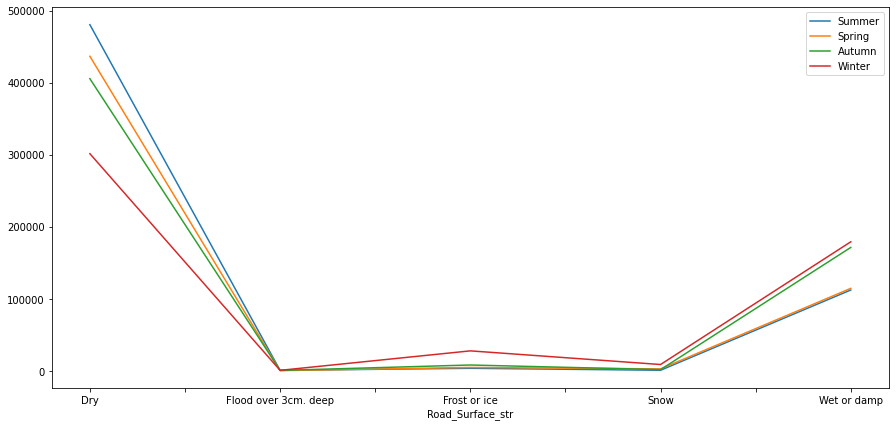

In [28]:
joined.loc[(joined['Road_Surface'] == 1), 'Road_Surface_str'] = "Dry"
joined.loc[(joined['Road_Surface'] == 2), 'Road_Surface_str'] = "Wet or damp"
joined.loc[(joined['Road_Surface'] == 3), 'Road_Surface_str'] = "Flood over 3cm. deep"
joined.loc[(joined['Road_Surface'] == 4), 'Road_Surface_str'] = "Snow"
joined.loc[(joined['Road_Surface'] == 6), 'Road_Surface_str'] = "Frost or ice"


joined.loc[(joined["Date"].dt.month >= 6) & (joined["Date"].dt.month <= 8), 'Season'] = "Summer"
joined.loc[(joined["Date"].dt.month >= 3) & (joined["Date"].dt.month <= 5), 'Season'] = "Spring"
joined.loc[(joined["Date"].dt.month >= 9) & (joined["Date"].dt.month <= 11), 'Season'] = "Autumn"
joined.loc[(joined["Date"].dt.month == 12) | (joined["Date"].dt.month == 1) | (joined["Date"].dt.month == 2), 'Season'] = "Winter"

df1_1 = joined[(joined["Season"]=="Summer")]
df1_2 = joined[(joined["Season"]=="Spring")]
df1_3 = joined[(joined["Season"]=="Autumn")]
df1_4 = joined[(joined["Season"]=="Winter")]

df1_1.groupby([df1_1["Road_Surface_str"]])["Road_Surface_str"].count().plot(kind='line', figsize=(15,7), label='Summer', legend=True)
df1_2.groupby([df1_2["Road_Surface_str"]])["Road_Surface_str"].count().plot(kind='line', figsize=(15,7), label='Spring', legend=True)
df1_3.groupby([df1_3["Road_Surface_str"]])["Road_Surface_str"].count().plot(kind='line', figsize=(15,7), label='Autumn', legend=True)
df1_4.groupby([df1_4["Road_Surface_str"]])["Road_Surface_str"].count().plot(kind='line', figsize=(15,7), label='Winter', legend=True)


joined = joined.drop('Season', 1)
joined = joined.drop('Road_Surface_str', 1)

Através do 1º gráfico é possivel verificar que o número de acidentes tem diminuido com o passar do tempo, existem cerca de menor 40000 de acidentes em 2014 quando comparado a 2005, uma redução de 30% em acidentes.
Nos gráficos seguintes observa-se que a estação do ano com mais acidentes é o verão, isto é facilmente explicado pelo facto de ser férias e haver não só mais pessoas a circular na estrada como a fazer percursos maiores.
Ao contrário do esperado o inverno é das estações com menos acidentes, mesmo tendo as estradas em piores condições (mais vezes molhada ou cheia)

#### Como explicar isto??

# 6. Como é que a localização afeta a severidade do acidente?

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A 

<AxesSubplot:xlabel='Severity_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity With Area')

(0.0, 100.0)

Text(-0.4, 58.3967166540799, '58.4%')

Text(0.6000000000000001, 58.21983079211602, '58.22%')

Text(1.6, 61.933883252741694, '61.93%')

Text(-2.7755575615628914e-17, 41.6032833459201, '41.6%')

Text(0.9999999999999999, 41.78016920788397, '41.78%')

Text(2.0, 38.066116747258306, '38.07%')

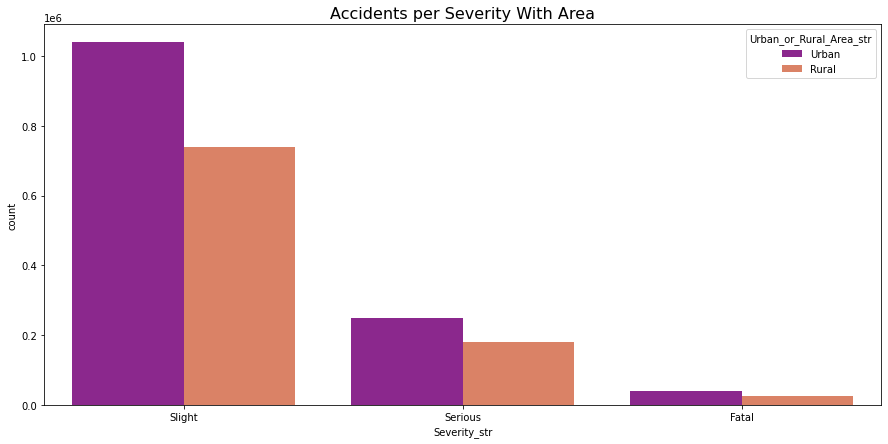

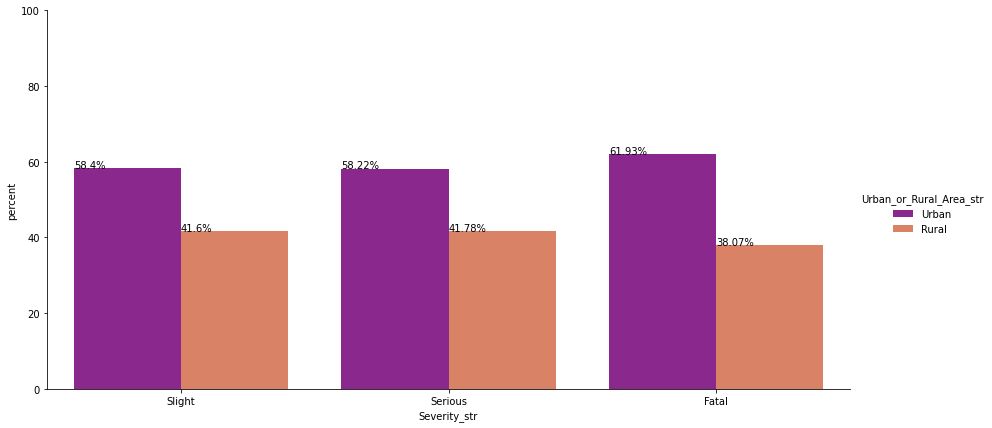

In [63]:
aux = joined[joined['Urban_or_Rural_Area'] != 3]

aux.loc[(aux['Urban_or_Rural_Area'] == 1), 'Urban_or_Rural_Area_str'] = "Urban"
aux.loc[(aux['Urban_or_Rural_Area'] == 2), 'Urban_or_Rural_Area_str'] = "Rural"
aux.loc[(aux['Urban_or_Rural_Area'] == 3), 'Urban_or_Rural_Area_str'] = "Unallocated"


aux.loc[(aux['Severity'] == 1), 'Severity_str'] = "Slight"
aux.loc[(aux['Severity'] == 2), 'Severity_str'] = "Serious"
aux.loc[(aux['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(x="Severity_str", hue="Urban_or_Rural_Area_str", order=aux['Severity_str'].value_counts().index, hue_order=aux['Urban_or_Rural_Area_str'].value_counts().index,data=aux,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Area', fontsize=16)

#percentage
x,y = 'Severity_str', 'Urban_or_Rural_Area_str'

df1 = aux.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=aux['Severity_str'].value_counts().index, hue_order=aux['Urban_or_Rural_Area_str'].value_counts().index, palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    


# 7. Como é o tipo de veículo afeta os acidentes?

<AxesSubplot:xlabel='count', ylabel='Type_of_Vehicle_str'>

Text(0.5, 1.0, 'Accidents per Severity With Area')

(0.0, 100.0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Car'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Pedal Cycle'),
  Text(3, 0, 'Motorcycle over 125cc'),
  Text(4, 0, 'Motorcycle 50cc and under'),
  Text(5, 0, 'Van / Goods 3.5 tonnes mgw or under'),
  Text(6, 0, 'Goods 7.5 tonnes mgw and over'),
  Text(7, 0, 'Motorcycle 125cc and under'),
  Text(8, 0, 'Bus or coach (17 or more pass seats)'),
  Text(9, 0, 'Goods over 3.5t. and under 7.5t'),
  Text(10, 0, 'Agricultural vehicle'),
  Text(11, 0, 'Tram')])

Text(-0.4, 15.749421452020881, '15.75%')

Text(0.6, 57.25286942360992, '57.25%')

Text(1.5999999999999999, 13.56627391800646, '13.57%')

Text(2.6, 38.660821771222196, '38.66%')

Text(3.6, 78.51299400276795, '78.51%')

Text(4.6000000000000005, 14.13816230717639, '14.14%')

Text(5.6000000000000005, 48.97983581732685, '48.98%')

Text(6.6000000000000005, 73.95284194383207, '73.95%')

Text(7.6000000000000005, 30.968041476437357, '30.97%')

Text(8.6, 32.3746808224701, '32.37%')

Text(9.6, 69.35636985000949, '69.36%')

Text(10.6, 57.04697986577181, '57.05%')

Text(-0.2, 69.28948926322587, '69.29%')

Text(0.8, 27.863238494903154, '27.86%')

Text(1.7999999999999998, 82.22667208388957, '82.23%')

Text(2.8, 49.32147330277126, '49.32%')

Text(3.8, 5.560510533599877, '5.56%')

Text(4.800000000000001, 68.32997987927565, '68.33%')

Text(5.800000000000001, 38.25615685024309, '38.26%')

Text(6.800000000000001, 7.097670852103902, '7.1%')

Text(7.800000000000001, 55.48247310995899, '55.48%')

Text(8.8, 52.922994221206835, '52.92%')

Text(9.8, 22.498576039491173, '22.5%')

Text(10.8, 6.7114093959731544, '6.71%')

Text(2.7755575615628914e-17, 14.961089284753243, '14.96%')

Text(1.0, 3.4574009990135135, '3.46%')

Text(2.0, 3.1216746957648924, '3.12%')

Text(3.0, 8.161776329389447, '8.16%')

Text(3.9999999999999996, 6.610795017684145, '6.61%')

Text(5.0, 17.531857813547955, '17.53%')

Text(6.0, 8.237028771817965, '8.24%')

Text(7.0, 8.180772548643727, '8.18%')

Text(8.0, 7.76909386365395, '7.77%')

Text(9.0, 11.100658513640639, '11.1%')

Text(10.0, 5.012340991076514, '5.01%')

Text(11.0, 3.691275167785235, '3.69%')

Text(0.20000000000000007, nan, 'nan%')

Text(1.2000000000000002, 11.426491082473419, '11.43%')

Text(2.1999999999999997, 1.0853793023390794, '1.09%')

Text(3.1999999999999997, 3.855928596617095, '3.86%')

Text(4.2, 9.315700445948023, '9.32%')

Text(5.2, nan, 'nan%')

Text(6.2, 4.526978560612099, '4.53%')

Text(7.2, 10.768714655420302, '10.77%')

Text(8.200000000000001, 5.780391549949702, '5.78%')

Text(9.200000000000001, 3.601666442682435, '3.6%')

Text(10.200000000000001, 3.1327131194228213, '3.13%')

Text(11.200000000000001, 32.5503355704698, '32.55%')

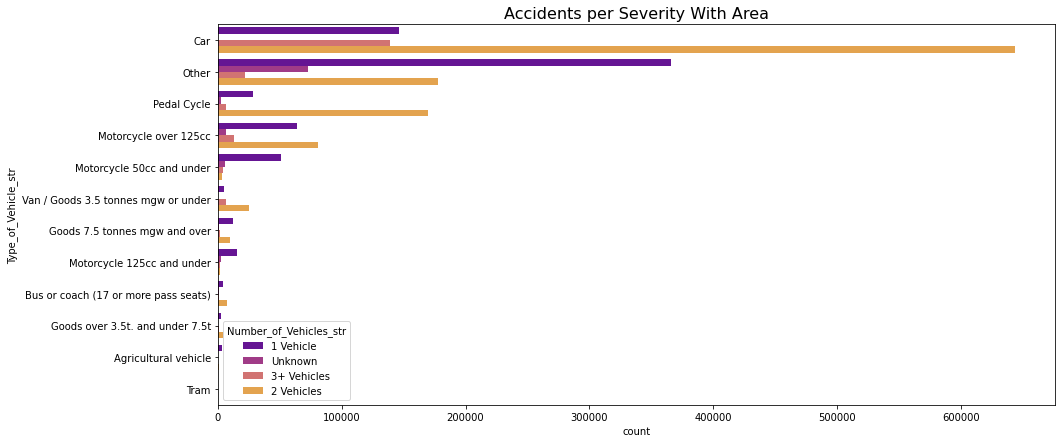

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


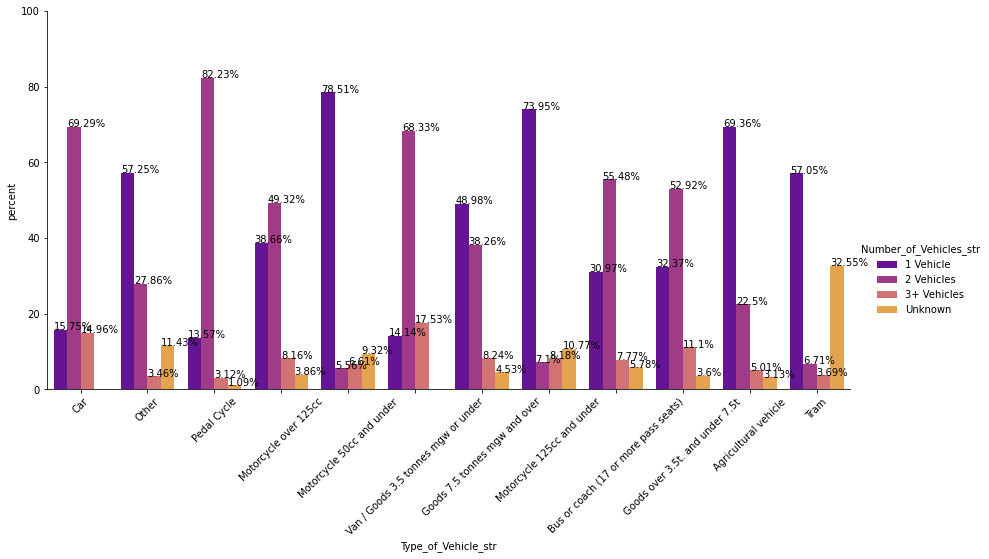

In [30]:
joined.loc[(joined['Type_of_Vehicle'] == 1), 'Type_of_Vehicle_str'] = "Pedal Cycle"
joined.loc[(joined['Type_of_Vehicle'] == 2), 'Type_of_Vehicle_str'] = "Motorcycle 50cc and under"
joined.loc[(joined['Type_of_Vehicle'] == 3), 'Type_of_Vehicle_str'] = "Motorcycle 125cc and under"
joined.loc[(joined['Type_of_Vehicle'] == 4), 'Type_of_Vehicle_str'] = "Motorcycle over 125cc"
joined.loc[(joined['Type_of_Vehicle'] == 5), 'Type_of_Vehicle_str'] = "Bus or coach (17 or more pass seats)"
joined.loc[(joined['Type_of_Vehicle'] == 6), 'Type_of_Vehicle_str'] = "Car"
joined.loc[(joined['Type_of_Vehicle'] == 7), 'Type_of_Vehicle_str'] = "Agricultural vehicle"
joined.loc[(joined['Type_of_Vehicle'] == 8), 'Type_of_Vehicle_str'] = "Tram"
joined.loc[(joined['Type_of_Vehicle'] == 9), 'Type_of_Vehicle_str'] = "Van / Goods 3.5 tonnes mgw or under"
joined.loc[(joined['Type_of_Vehicle'] == 10), 'Type_of_Vehicle_str'] = "Goods over 3.5t. and under 7.5t"
joined.loc[(joined['Type_of_Vehicle'] == 11), 'Type_of_Vehicle_str'] = "Goods 7.5 tonnes mgw and over"
joined.loc[(joined['Type_of_Vehicle'] == 0), 'Type_of_Vehicle_str'] = "Other"



joined.loc[(joined['Number_of_Vehicles_In_Accident'] == 1), 'Number_of_Vehicles_str'] = "1 Vehicle"
joined.loc[(joined['Number_of_Vehicles_In_Accident'] == 2), 'Number_of_Vehicles_str'] = "2 Vehicles"
joined.loc[(joined['Number_of_Vehicles_In_Accident'] == 3), 'Number_of_Vehicles_str'] = "3+ Vehicles"
joined.loc[(joined['Number_of_Vehicles_In_Accident'] == -1), 'Number_of_Vehicles_str'] = "Unknown"



f, ax = plt.subplots(figsize=(15,7))
sns.countplot(y="Type_of_Vehicle_str", hue="Number_of_Vehicles_str",  order=joined['Type_of_Vehicle_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Area', fontsize=16)

#percentage
x,y = 'Type_of_Vehicle_str', 'Number_of_Vehicles_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Type_of_Vehicle_str'].value_counts().index ,palette='plasma')
g.ax.set_ylim(0,100)
plt.xticks(rotation=45)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Type_of_Vehicle_str', 1)
joined = joined.drop('Number_of_Vehicles_str', 1)

<AxesSubplot:xlabel='Severity_str', ylabel='count'>

Text(0.5, 1.0, 'Accidents per Severity With Area')

(0.0, 100.0)

Text(-0.4, 25.7687714650095, '25.77%')

Text(0.6, 41.56304596074451, '41.56%')

Text(1.6, 48.51572246569207, '48.52%')

Text(-0.33333333333333337, 50.877592191131704, '50.88%')

Text(0.6666666666666666, 24.707682247186625, '24.71%')

Text(1.6666666666666665, 23.39976328332427, '23.4%')

Text(-0.2666666666666667, 5.996002899926091, '6.0%')

Text(0.7333333333333333, 13.699405604302292, '13.7%')

Text(1.7333333333333332, 12.937845878250856, '12.94%')

Text(-0.2, 9.866686893239562, '9.87%')

Text(0.7999999999999999, 9.04745405389578, '9.05%')

Text(1.7999999999999998, 4.126547455295736, '4.13%')

Text(-0.13333333333333336, 1.0642470040858854, '1.06%')

Text(0.8666666666666666, 1.4947734171408493, '1.49%')

Text(1.8666666666666665, 3.1812801893733407, '3.18%')

Text(-0.06666666666666671, 2.4240136458809234, '2.42%')

Text(0.9333333333333332, 5.330284900006832, '5.33%')

Text(1.9333333333333331, 3.1332970794280413, '3.13%')

Text(-6.938893903907228e-18, 2.0240096476048857, '2.02%')

Text(0.9999999999999999, 1.242716456659867, '1.24%')

Text(1.9999999999999998, 1.522664022264163, '1.52%')

Text(0.06666666666666665, 0.7756067530882272, '0.78%')

Text(1.0666666666666669, 1.694125340386699, '1.69%')

Text(2.066666666666667, 1.1707878826653018, '1.17%')

Text(0.1333333333333333, 0.6369606516719556, '0.64%')

Text(1.1333333333333333, 0.47190528709605006, '0.47%')

Text(2.1333333333333333, 0.772528070119318, '0.77%')

Text(0.19999999999999996, 0.19244643339077916, '0.19%')

Text(1.2000000000000002, 0.38699161599500276, '0.39%')

Text(2.2, 0.6909567832123092, '0.69%')

Text(0.2666666666666666, 0.3576693108206873, '0.36%')

Text(1.2666666666666666, 0.35575900133714633, '0.36%')

Text(2.2666666666666666, 0.5438085793800582, '0.54%')

Text(0.33333333333333337, 0.01599310414979894, '0.02%')

Text(1.3333333333333335, 0.005856115248348088, '0.01%')

Text(2.3333333333333335, 0.0047983109945299255, '0.0%')

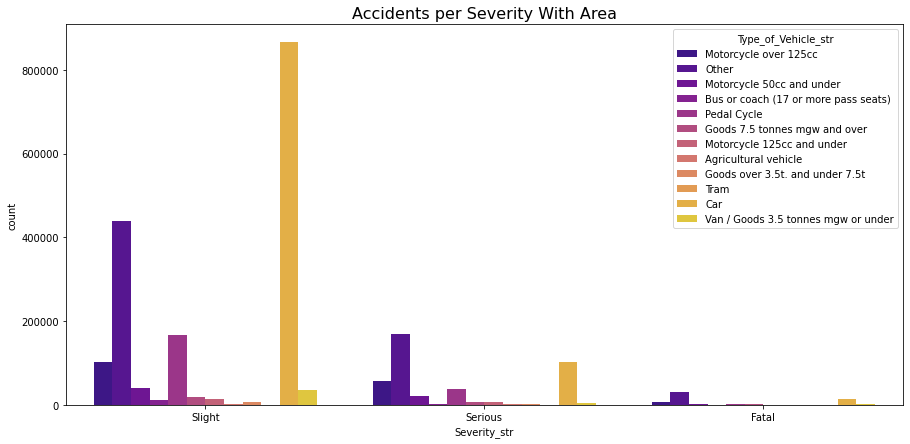

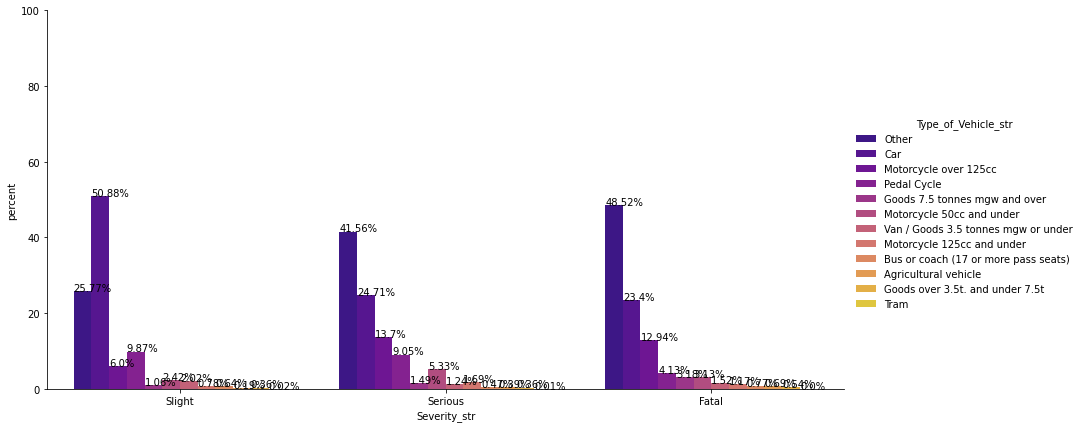

In [31]:
joined.loc[(joined['Type_of_Vehicle'] == 1), 'Type_of_Vehicle_str'] = "Pedal Cycle"
joined.loc[(joined['Type_of_Vehicle'] == 2), 'Type_of_Vehicle_str'] = "Motorcycle 50cc and under"
joined.loc[(joined['Type_of_Vehicle'] == 3), 'Type_of_Vehicle_str'] = "Motorcycle 125cc and under"
joined.loc[(joined['Type_of_Vehicle'] == 4), 'Type_of_Vehicle_str'] = "Motorcycle over 125cc"
joined.loc[(joined['Type_of_Vehicle'] == 5), 'Type_of_Vehicle_str'] = "Bus or coach (17 or more pass seats)"
joined.loc[(joined['Type_of_Vehicle'] == 6), 'Type_of_Vehicle_str'] = "Car"
joined.loc[(joined['Type_of_Vehicle'] == 7), 'Type_of_Vehicle_str'] = "Agricultural vehicle"
joined.loc[(joined['Type_of_Vehicle'] == 8), 'Type_of_Vehicle_str'] = "Tram"
joined.loc[(joined['Type_of_Vehicle'] == 9), 'Type_of_Vehicle_str'] = "Van / Goods 3.5 tonnes mgw or under"
joined.loc[(joined['Type_of_Vehicle'] == 10), 'Type_of_Vehicle_str'] = "Goods over 3.5t. and under 7.5t"
joined.loc[(joined['Type_of_Vehicle'] == 11), 'Type_of_Vehicle_str'] = "Goods 7.5 tonnes mgw and over"
joined.loc[(joined['Type_of_Vehicle'] == 0), 'Type_of_Vehicle_str'] = "Other"



joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(15,7))
sns.countplot(x="Severity_str", hue="Type_of_Vehicle_str",  order=joined['Severity_str'].value_counts().index,data=joined,palette='plasma',ax=ax)
ax.set_title('Accidents per Severity With Area', fontsize=16)

#percentage
x,y = 'Severity_str', 'Type_of_Vehicle_str'

df1 = joined.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', height=6 ,aspect=2 ,data=df1 , order=joined['Severity_str'].value_counts().index ,palette='plasma')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

joined = joined.drop('Type_of_Vehicle_str', 1)
joined = joined.drop('Severity_str', 1)

# 8. Como é que o tipo de viagem afeta o acidente?

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Journey_Purpose_str', ylabel='count'>

Text(0.5, 1.0, 'Number of Accidents according to the Journey Purpose')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Leisure'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Commuting to/from work'),
  Text(3, 0, 'Journey as part of work')])

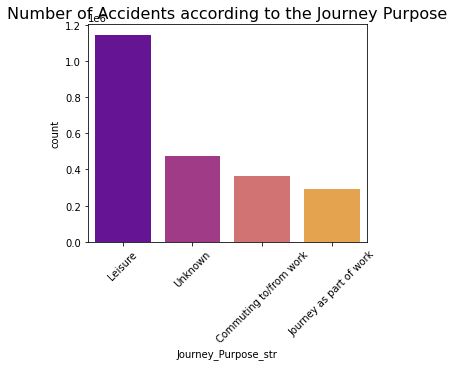

In [32]:
joined.loc[(joined['Journey_Purpose'] == 1), 'Journey_Purpose_str'] = "Commuting to/from work"
joined.loc[(joined['Journey_Purpose'] == 2), 'Journey_Purpose_str'] = "Leisure"
joined.loc[(joined['Journey_Purpose'] == 3), 'Journey_Purpose_str'] = "Journey as part of work"
joined.loc[(joined['Journey_Purpose'] == -1), 'Journey_Purpose_str'] = "Unknown"

f, ax = plt.subplots(figsize=(5, 4))
sns.countplot('Journey_Purpose_str',order = joined['Journey_Purpose_str'].value_counts().index, data=joined,ax=ax,palette='plasma')
ax.set_title('Number of Accidents according to the Journey Purpose', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 9. Como é que o o ponto de impacto afeta a gravidade do acidente?

# 10. Quais são as ruas com mais acidentes? 

<AxesSubplot:xlabel='Road_Number', ylabel='count'>

Text(0.5, 1.0, 'Roads with more accidents in UK')

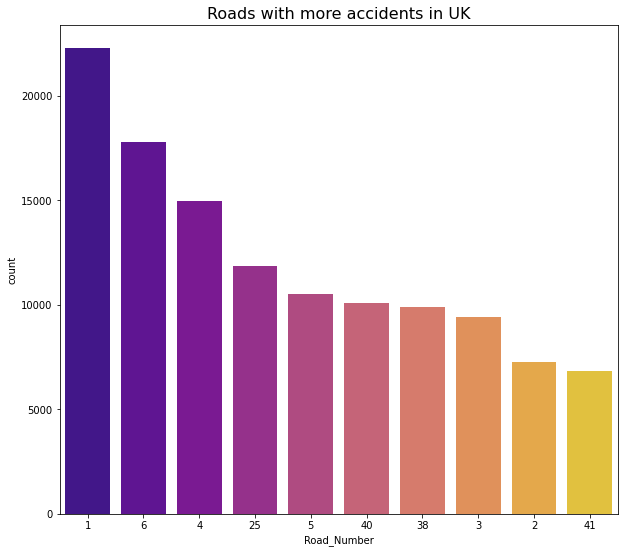

In [85]:
df1 = joined[joined["Country"]=="UK"]

l1 = df1['Road_Number'].value_counts()[1:11].index.tolist()

df1=df1.loc[df1['Road_Number'].isin(l1)]

f, ax = plt.subplots(figsize=(10, 9))

sns.countplot(x='Road_Number', order=df1['Road_Number'].value_counts().index, data=df1, palette='plasma',ax=ax)
ax.set_title('Roads with more accidents in UK', fontsize=16)
plt.show()

[1.0,
 7.0,
 2.0,
 4.0,
 6.0,
 3.0,
 10.0,
 86.0,
 8.0,
 13.0,
 5.0,
 9.0,
 12.0,
 20.0,
 19.0,
 63.0,
 11.0]

<AxesSubplot:xlabel='Road_Number', ylabel='count'>

Text(0.5, 1.0, 'Roads with more accidents in FR')

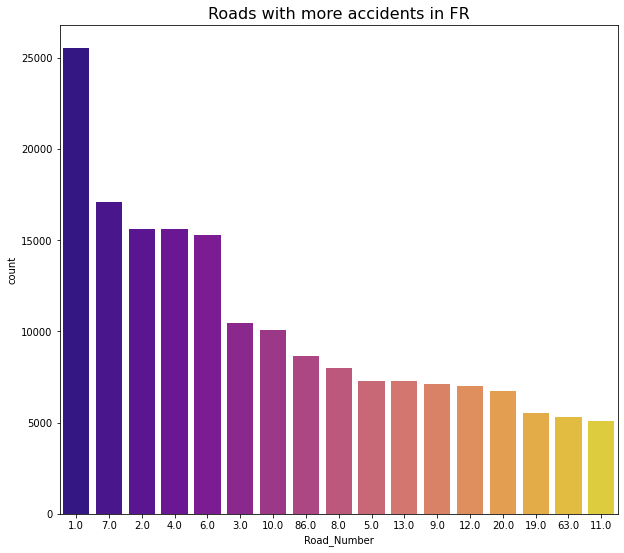

In [90]:
df2 = joined[joined["Country"]=="FR"]

l2 = df2['Road_Number'].value_counts()[1:11].index.tolist()
l2

df2=df2.loc[df2['Road_Number'].isin(l2)]

f, ax = plt.subplots(figsize=(10, 9))

sns.countplot(x='Road_Number', order=df2['Road_Number'].value_counts().index, data=df2, palette='plasma',ax=ax)
ax.set_title('Roads with more accidents in FR', fontsize=16)
plt.show()

# Nao sei onde por estes

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity_str', ylabel='count'>

Text(0.5, 1.0, 'Number of Accidents Severity')

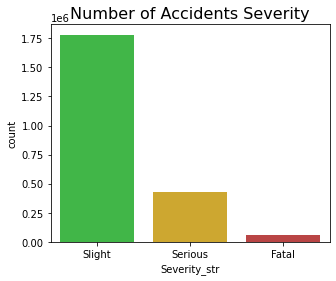

In [34]:
joined.loc[(joined['Severity'] == 1), 'Severity_str'] = "Slight"
joined.loc[(joined['Severity'] == 2), 'Severity_str'] = "Serious"
joined.loc[(joined['Severity'] == 3), 'Severity_str'] = "Fatal"

f, ax = plt.subplots(figsize=(5, 4))
sns.countplot('Severity_str', order=joined['Severity_str'].value_counts().index, data=joined, palette={ "Slight" : "#2dc937", "Serious" : "#e7b416", "Fatal" : "#cc3232"},ax=ax)
ax.set_title('Number of Accidents Severity', fontsize=16)
plt.show()

joined = joined.drop('Severity_str', 1)

In [36]:
joined.reset_index(level=0, inplace=True)
cols = ['Age_of_Casualty', 'Light_Conditions', 'Road_Class', 'Road_Surface', 'Severity', 'Sex_of_Driver']
pp = sns.pairplot(joined[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

c:\users\asilva\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Error in callback <function flush_figures at 0x0000018EE80FA3A0> (for post_execute):


KeyboardInterrupt: 